<img src = "imagens/icon.png"></img>

# Sumário
* <a href="#contexto">Contexto</a>
* <a href="#sobre">Sobre os Dados</a>
* <a href="#regras">Algumas regras de negócio</a>
* <a href="#libs">Importação das Bibliotecas</a>
* <a href="#eda">Análise Exploratória dos Dados e Tratamentos</a>
* <a href="#insights">Insights</a>

<h1><p id = "contexto" name = "contexto">Contexto</p></h1>
Na Hotmart, possuímos três principais personas que integram nosso negócio: os
produtores, os afiliados e os compradores.<br>
- <b>Produtores são pessoas que criam produtos digitais na Hotmart</b>, como cursos de idiomas, ebooks de receitas culinárias, audiolivros, softwares, dentre muitos outros exemplos.<br>
- <b>Afiliados são pessoas que promovem produtos dos produtores</b> em troca de uma comissão na venda, que varia de produto para produto, e de afiliado para afiliado.<br>
- <b>Compradores são pessoas que adquirem um ou mais produtos digitais.</b><br>
<b>Uma venda é feita por um afiliado quando alguém clica em um link de afiliados.</b> Eles geralmente fazem a promoção desses produtos em redes sociais, vídeos, anúncios, etc.<br>
<b>Já uma venda é feita por um produtor quando alguém tem acesso direto ao seu produto, sem intermediação do afiliado.</b> Por exemplo, pessoas que seguem o Whindersson Nunes no Youtube e entraram em seu site oficial para adquirir seu produto, ou clicaram no link do produto sem código de afiliação.

<h1><p id = "sobre" name = "sobre">Sobre os dados</p></h1>
<br>Durante sua avaliação, você irá analisar dados referentes a uma amostra de <b>compras feitas na Hotmart em 2016.</b> Tratam-se de mais de <b>1,5 milhão registros</b> de compras realizadas em nossa plataforma. Abaixo, nós iremos detalhar o que significa cada campo:<br><br>
- <b>purchase_id:</b> Identificação da compra na Hotmart;<br>
- <b>product_id:</b> Identificação do produto na Hotmart;<br>
- <b>affiliate_id:</b> Identificação do afiliado na Hotmart;<br>
- <b>producer_id:</b> Identificação do produtor na Hotmart;<br>
- <b>buyer_id:</b> Identificação do comprador na Hotmart;<br>
- <b>purchase_date:</b> Data e hora em que a compra foi realizada;<br>
- <b>product_creation_date:</b> Data e hora em que o produto foi criado na Hotmart;<br>
- <b>product_category:</b> categoria do produto na Hotmart. Exemplo: e-book, software, curso online, e-tickets, etc.;<br>
- <b>product_niche:</b> nicho de mercado que o produto faz parte. Exemplo: educação, saúde e bem-estar, sexualidade, etc.;<br>
- <b>purchase_value:</b> valor da compra. Esse dado, assim como nicho e categoria foi codificado para manter a confidencialidade. O valor apresentado no dataset é o z-score do valor real;<br>
- <b>affiliate_commission_percentual:</b> percentual de comissão que o afiliado receberá da compra;<br>
- <b>purchase_device:</b> tipo de dispositivo utilizado no momento da compra, como: Desktop, Mobile, Tablet, ou Outros;<br>
- <b>purchase_origin:</b> endereço do site do qual a pessoa veio antes da compra. Por exemplo, se uma pessoa veio do Facebook, Youtube, ou até mesmo de outra página no site oficial do produto;<br>
- <b>is_origin_page_social_network:</b> informa se essa compra veio de uma URL do Facebook, Youtube, Instagram, Pinterest, ou Twitter.<br>

<h1><p id = "regras" name = "regras">Algumas regras de negócio</p></h1>
- Quando a compra for feita diretamente pelo produtor, ou seja, quando não houver afiliado intermediando a compra, o campo <b>affiliate_commission_percentual</b> terá valor <b>0</b>,e o campo <b>affiliate_id</b> será igual ao <b>producer_id</b>;<br><br>
- No campo <b>purchase_origin</b> nós apenas consideramos o host do site. Isso quer dizer que, se uma pessoa veio do site <b>www.meuproduto.com/promocoes</b>, esse campo só irá retornar o valor <b>www.meuproduto.com</b>;

<h1><p id = "libs" name = "libs">Importação das Bibliotecas</p></h1>

In [1]:
# Manipulação de Dados
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np

# Visualização Gráfica
from bokeh.io import push_notebook, show, output_notebook
import matplotlib.pyplot as plt
pd.set_option('plotting.backend', 'pandas_bokeh')
output_notebook()

# Construção do modelo de clusterização
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

Loading BokehJS ...

## Carregando os Dados

In [2]:
df = pd.read_csv("data/sales_data.csv")
df.drop(df.index[0], inplace=True)

<h1><p id = "eda" name = "eda">Análise Exploratória dos Dados e Tratamentos</p></h1>
* Não temos linhas duplicadas

In [3]:
df.head()

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network
1,1663958,6640.0,209372.0,116238.0,1200397.0,2016-06-26 12:00:00,2011-03-19 15:47:36,Video,Presentation skills,-0.265302,50.0,Smart TV,Origin ef2b,"0,0"
2,1677087,2350.0,141418.0,2821.0,1083764.0,2016-06-26 12:00:00,2010-07-05 01:50:15,Podcast,Child psychology,-0.177077,60.0,Smart TV,Origin ef2b,"0,0"
3,2017360,35669.0,618642.0,618642.0,1436106.0,2016-06-26 12:00:00,2012-06-13 02:59:37,Podcast,Presentation skills,-0.468989,0.0,Smart TV,Origin ef2b,"0,0"
4,2017379,57998.0,1164511.0,70388.0,1436118.0,2016-06-26 12:00:00,2013-05-07 08:51:31,Podcast,Anxiety management,-0.401168,50.0,Smart TV,Origin ef2b,"0,0"
5,2017382,58329.0,1261488.0,221253.0,1386357.0,2016-06-26 12:00:00,2013-05-12 08:12:06,Podcast,Teaching English,-0.452489,50.0,Smart TV,Origin ef2b,"0,0"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599828 entries, 1 to 1599828
Data columns (total 14 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   purchase_id                      1599828 non-null  int64  
 1   product_id                       1599828 non-null  float64
 2   affiliate_id                     1599828 non-null  float64
 3   producer_id                      1599828 non-null  float64
 4   buyer_id                         1599828 non-null  float64
 5   purchase_date                    1599828 non-null  object 
 6   product_creation_date            1599828 non-null  object 
 7   product_category                 1599828 non-null  object 
 8   product_niche                    1599828 non-null  object 
 9   purchase_value                   1599828 non-null  float64
 10  affiliate_commission_percentual  1599828 non-null  float64
 11  purchase_device                  1599828 non-null 

In [5]:
# Deixando apenas a data das compras. 
df['purchase_date'] = pd.to_datetime(df['purchase_date'], infer_datetime_format=True)

In [6]:
# Convertendo para float
df['is_origin_page_social_network'] = df['is_origin_page_social_network'].str.replace(',', '.').astype(float)

In [7]:
#Quantidade de produtos distintos no Dataset
len(df.product_id.unique())

17883

In [8]:
#Quantidade de afiliados distintos no Dataset
len(df.affiliate_id.unique())

22947

In [9]:
#Quantidade de produtores distintos no Dataset
len(df.producer_id.unique())

8020

In [10]:
#Quantidade de compradores distintos no Dataset
print("Quantidade de Compradores distintos: ", len(df.buyer_id.unique()))

Quantidade de Compradores distintos:  1100649


In [11]:
#Quantidade de categorias distintos e quantidade de ocorrências no Dataset
df['product_category'].value_counts()

Phisical book      1334610
Podcast             216720
Workshop             38246
eBook                 3965
Subscription          1970
In-class course       1561
App                   1557
eTicket                847
Webinar                295
Video                   57
Name: product_category, dtype: int64

In [12]:
#Quantidade de nichos distintos e quantidade de ocorrências no Dataset
df['product_niche'].value_counts()

Negotiation               279921
Anxiety management        251675
Personal finance          186849
Presentation skills       140460
Immigration                95660
Government                 93365
YouTube video creation     80206
Online course creation     60431
Careers                    52929
Organization               48632
Accounting                 45701
Procrastination            40620
Economics                  40371
Biology                    33254
Media training             32695
Teaching English           26007
Filmmaking                 21300
Child psychology           18919
Physics                    14705
Global diplomacy           13881
Genetics                   10154
Storytelling                7365
Disease                     4174
Thermodynamics               549
Travel hacking                 5
Name: product_niche, dtype: int64

In [327]:
media = df['purchase_value'].mean()
desvio = df['purchase_value'].std()
calc1 = media + 3*desvio
calc2 = media - 3*desvio
dfteste = df.loc[(df['purchase_value'] > calc1) | (df['purchase_value'] < calc2)].copy()

In [351]:
media+3*desvio

3.0000007051514825

In [330]:
df['purchase_value'].max()

124.561

In [377]:
df.loc[df.product_id == 135852.0, 'purchase_value'].sort_values().median()

2.6401000000000003

In [355]:
dfteste.loc[dfteste.product_id == 111069.0, :].sort_values('purchase_date')['product_category'].unique()

array(['Phisical book'], dtype=object)

In [379]:
for i in dfteste.product_id.unique():
    if len(df.loc[df.product_id == i, 'purchase_value'].unique()) > 1:
        qntd_fora = len(dfteste.loc[dfteste.product_id == i, :].sort_values('purchase_date')['purchase_value'].unique())
        qntd_total = len(df.loc[df.product_id == i, :].sort_values('purchase_date')['purchase_value'].unique())
        porc_fora = qntd_fora/qntd_total*100
        if porc_fora < 30:
            print("id: {} - Categoria: {}".format(i, dfteste.loc[dfteste.product_id == i, :].sort_values('purchase_date')['product_category'].unique()))
            print(df.loc[df.product_id == i, :].sort_values('purchase_date')['purchase_value'].unique())
            print("Quantidade fora: ", qntd_fora)
            print("Quantidade total: ", qntd_total)
            print("Porcentagem fora: {:.2f}%".format(porc_fora))
            media = df.loc[df.product_id == i, 'purchase_value'].mean()
            mediana = df.loc[df.product_id == i, 'purchase_value'].median()
            print("Média: {:.2f}".format(media))
            print("Mediana: {:.2f}".format(moda))
            df.loc[df.product_id == i, 'purchase_value'] = mediana
            print()

id: 135852.0 - Categoria: ['Phisical book']
[2.60276  2.8626   2.21189  2.67744  0.836573 8.89096  1.03589  0.684188
 7.16963 ]
Quantidade fora:  2
Quantidade total:  9
Porcentagem fora: 22.22%
Média: 3.79
Mediana: 2.27

id: 174947.0 - Categoria: ['Phisical book']
[3.14907  2.10955  2.07503  2.04349  0.829196 0.169629 2.02318  2.01102
 2.03829  0.146972 1.84037  0.832556 0.660818 1.62628  1.34681  1.38207
 0.66429  0.815043 0.82944  2.1466   2.02634  1.72265  2.06722  0.877945
 2.05485  0.184703 2.03679  0.635157 2.18895  0.625678 0.864017 2.14152
 0.187687 2.14546  1.68143  0.867527 2.14822  0.859099 0.872258 0.864224
 0.189264 0.867058 0.608521 0.176087 0.605198 0.876613 0.874754 1.4048
 7.0082   0.621398 0.193262 0.178546 0.618038 2.16201  0.89208  0.662883
 0.215056 0.65941  7.39939  0.959169 7.42964  2.39523  2.40079  1.03572
 2.40201  1.08038  0.252242 0.256841 0.199982 2.35938  7.54388  2.35384
 2.41257  1.01055  1.03029 ]
Quantidade fora:  5
Quantidade total:  75
Porcentagem fo

id: 74283.0 - Categoria: ['Workshop']
[ 1.01612e+00  9.54833e-01  1.02997e+00  1.04914e+00  2.45654e+00
  2.79585e+00  2.87570e+00  1.42423e+00  5.24282e+00  2.21476e+00
  7.70874e-01  9.92751e-01  2.08299e+00  1.54598e+00  3.64318e+00
  8.70456e-01  2.88227e+00  8.36761e-01  8.53543e-01  8.20092e-01
  9.04807e-01  1.81848e+00  1.98349e-01  8.87556e-01  2.35072e+00
  2.18139e+00  3.54272e+00  2.45091e+00  1.40046e+00  2.64425e+00
  9.57273e-01  3.94698e+00  1.59520e+00  7.15161e+00  1.89340e+00
 -1.71445e-01  6.90729e+00  2.82633e+00  2.04680e+00  2.26093e-01
  2.07820e+00  3.01968e+00  1.20569e+00  1.33664e+00  4.90405e+00
  4.21352e-01  2.68207e+00  2.44977e-01  7.44047e+00 -1.08974e-01
  3.33642e+00  2.46217e+00  7.72751e-01  4.69774e+00 -3.59158e-01
 -1.77077e-01 -3.52326e-01 -1.63411e-01 -3.47670e-01 -1.44677e-01
  2.40392e+00  5.00491e-03 -3.49998e-01 -3.43015e-01  1.64014e+00
  3.91694e-01  2.49299e+00  1.50284e+00  2.31635e+00  2.45560e+00
  2.25756e+00  4.62555e-01  1.70568e+0

id: 113724.0 - Categoria: ['Phisical book']
[ 3.40073e+00  3.91694e-01  4.99291e-01  2.50196e-01 -1.71445e-01
  5.68137e-02 -1.75206e-02  7.10048e-02  2.11413e-03 -6.27664e-03
  2.22745e-02  8.77794e-03  2.91073e-02  1.19059e-01  6.39656e-02
  1.55168e-02  1.08641e-01  5.85970e-02  7.31823e-02  1.62677e-02
  5.14076e-02  3.71789e-02  4.42557e-02  1.10650e-01  1.28783e-01
  6.58239e-02  1.68308e-02  9.54826e-02  1.35203e-01  1.76424e-01
  7.25816e-02  1.11250e-01  9.55952e-02  1.51590e-01  1.03385e-01
  1.19228e-01  1.59680e-01]
Quantidade fora:  1
Quantidade total:  37
Porcentagem fora: 2.70%
Média: 0.06
Mediana: 2.27

id: 188079.0 - Categoria: ['Phisical book']
[ 1.33589   4.71341   1.43014  -0.355404 -0.346056  3.06285   1.60244
 -0.524346  0.397325 -0.537486  1.40628  -0.539363  0.472635  1.06943
  1.25241  -0.111002 -0.173322]
Quantidade fora:  2
Quantidade total:  17
Porcentagem fora: 11.76%
Média: 0.21
Mediana: 2.27

id: 54512.0 - Categoria: ['Phisical book']
[ 2.64425  -0.265302

Média: 0.85
Mediana: 2.27

id: 122121.0 - Categoria: ['Phisical book']
[ 0.397325  0.960464  0.772751  1.99289   0.585038  3.51336  -0.25967
  0.209612  1.33589   0.491182]
Quantidade fora:  1
Quantidade total:  10
Porcentagem fora: 10.00%
Média: 1.04
Mediana: 2.27

id: 105701.0 - Categoria: ['Workshop']
[1.54598   5.07889   1.33026   2.74411   0.76712   2.26882   5.36654
 1.51797   1.86629   1.70107   1.67434   1.84106   1.62138   3.07321
 1.81043   1.70568   2.08569   2.0248    2.83196   1.99457   5.64766
 1.78997   6.69442   4.59065   1.87632   3.40253   1.90549   4.71262
 3.95261   3.31101   2.05509   0.581284  1.7064    0.579407  0.768847
 0.621417  0.650062  3.94135   0.746603  0.664534  0.708628  0.679082
 1.70005   0.738587  2.07916   4.17826   1.78411   2.8207    1.81848
 2.02254   2.45654   0.426683  0.806539  0.549448  0.486958  0.652014
 0.771099  1.70381   0.926413  2.15432   0.391694  0.0162677 0.672888
 0.0658239 0.573775  0.629751  0.615598  0.0442557 1.28006   0.644055

id: 201162.0 - Categoria: ['Podcast']
[-0.531854  2.17256   2.13981   2.01166   2.4434    2.23875   2.27215
  2.37413   2.20547   2.64988   3.06026   3.18967   2.93367   2.85096
  2.47499   2.33077   2.81664   2.58621   2.51172   2.81011   2.70008
  2.66189   3.01765   2.33587   1.85323   1.71132   2.09222 ]
Quantidade fora:  3
Quantidade total:  27
Porcentagem fora: 11.11%
Média: 2.54
Mediana: 2.27

id: 203914.0 - Categoria: ['Phisical book']
[1.80065  1.81737  3.94497  4.90234  1.16627  0.622224 1.52028  4.92866
 1.84399  1.83491  0.622374 1.67828  0.722951]
Quantidade fora:  3
Quantidade total:  13
Porcentagem fora: 23.08%
Média: 2.15
Mediana: 2.27

id: 176243.0 - Categoria: ['Phisical book']
[2.59267 2.52374 2.51874 2.27297 3.18862 2.30509 2.23916 2.44587]
Quantidade fora:  1
Quantidade total:  8
Porcentagem fora: 12.50%
Média: 2.49
Mediana: 2.27

id: 164406.0 - Categoria: ['Workshop']
[ 1.33026    1.64689    1.49665    0.391694   0.0218991  1.54598
  1.59606    1.44822   -0.522469

id: 166074.0 - Categoria: ['Phisical book']
[1.31149  1.40452  2.50722  1.62482  1.51647  1.47626  1.42824  1.18602
 1.14592  0.936061 1.57466  1.59666  1.5251   3.02275  1.05884  1.06742
 1.54975  1.45218  1.19165  0.940942 1.30409  1.19278 ]
Quantidade fora:  1
Quantidade total:  22
Porcentagem fora: 4.55%
Média: 1.47
Mediana: 2.27

id: 103955.0 - Categoria: ['Phisical book']
[1.41195 1.21328 1.12941 1.36667 1.12939 1.23468 1.25621 1.29429 1.12377
 1.27804 1.31562 1.40519 8.84441 1.89903 1.4124 ]
Quantidade fora:  1
Quantidade total:  15
Porcentagem fora: 6.67%
Média: 1.41
Mediana: 2.27

id: 204102.0 - Categoria: ['Workshop']
[1.27958 1.34903 1.46729 3.47586]
Quantidade fora:  1
Quantidade total:  4
Porcentagem fora: 25.00%
Média: 1.63
Mediana: 2.27

id: 209467.0 - Categoria: ['Workshop']
[ 1.42423   1.5212    1.44822   5.35516   1.33026   1.54598   1.64689
  1.49665   0.76712  -0.447383  0.86642   0.952955  0.849563  6.94475
  0.330049  0.209612  0.391694 -0.353527  0.883502  0.4625

id: 205927.0 - Categoria: ['Phisical book']
[ 2.06797  -0.539363  2.06801   2.06795   1.88026   1.23265   2.4434
  2.25568   2.44336   2.33313   1.36733   2.26023   2.42091   3.00654 ]
Quantidade fora:  1
Quantidade total:  14
Porcentagem fora: 7.14%
Média: 2.25
Mediana: 2.27

id: 214416.0 - Categoria: ['Phisical book']
[-0.539363  3.09664   2.76371   3.01149   2.64425   3.18314   2.92758
  3.02959   2.84503   1.39243   2.8042    1.47836   2.96935   3.05384
  3.18291   3.10813   2.75782   2.88612   3.23083   0.76712   0.900602
  1.13361   2.00099   2.78672   1.17371   2.84495   2.86581   3.17548
  0.960464  1.65343   3.02014   3.13955   1.97096   3.24945   2.80414
  0.456492  1.05507   1.15358   3.13215   0.585038  0.397325  2.91221
  2.63845   2.52471   2.09222 ]
Quantidade fora:  13
Quantidade total:  45
Porcentagem fora: 28.89%
Média: 2.87
Mediana: 2.27

id: 210504.0 - Categoria: ['Phisical book']
[ 1.98166  2.53817  1.99544  2.52813 17.7834   2.15606  2.69947  2.85469]
Quantidade f


id: 118258.0 - Categoria: ['Phisical book']
[-0.539363  3.8963    1.33026   3.51899   1.64374   1.49732   1.32778
  1.63022   1.43538 ]
Quantidade fora:  2
Quantidade total:  9
Porcentagem fora: 22.22%
Média: 1.55
Mediana: 2.27

id: 221560.0 - Categoria: ['Workshop']
[2.08111 1.33026 2.52471 1.64689 2.34875 5.59044 2.45353 2.41828 4.70346
 2.21279 2.17947 2.24637 5.3778 ]
Quantidade fora:  3
Quantidade total:  13
Porcentagem fora: 23.08%
Média: 2.46
Mediana: 2.27

id: 199822.0 - Categoria: ['Workshop']
[1.63998 1.8289  1.71973 1.77401 1.48606 3.51336]
Quantidade fora:  1
Quantidade total:  6
Porcentagem fora: 16.67%
Média: 1.94
Mediana: 2.27

id: 112012.0 - Categoria: ['Phisical book']
[1.15287  3.97934  0.804174 1.27269  3.19472  4.14768  1.80613  1.08678
 4.2165   1.11246  4.37429  4.73655  1.58164  1.36596  1.52743  3.82055
 1.35181  2.18473  1.47741  1.71163  5.18496  1.1059   5.10877  4.25456
 5.05831  5.22572  1.52381  1.50538  1.02324  1.35898  1.71103  5.20158
 1.50074  1.4625

id: 226958.0 - Categoria: ['Phisical book']
[-0.257793 -0.193896  7.96216  -0.24959 ]
Quantidade fora:  1
Quantidade total:  4
Porcentagem fora: 25.00%
Média: 0.12
Mediana: 2.27

id: 179552.0 - Categoria: ['Phisical book']
[2.96935 2.64425 3.18314 2.76371]
Quantidade fora:  1
Quantidade total:  4
Porcentagem fora: 25.00%
Média: 2.90
Mediana: 2.27

id: 224567.0 - Categoria: ['eBook']
[-0.0493943  -0.0337578  -0.0232459  -0.0201674  -0.266391   -0.0280701
  0.0102046   3.58452    -0.01585    -0.191775   -0.0110821  -0.00501897
 -0.0178773  -0.00458723 -0.448228   -0.019548   -0.01478    -0.469796  ]
Quantidade fora:  1
Quantidade total:  18
Porcentagem fora: 5.56%
Média: 0.09
Mediana: 2.27

id: 160508.0 - Categoria: ['Workshop']
[2.97293  1.30191  1.32369  1.09186  1.1531   1.36803  1.21585  2.93077
 1.1948   0.928553 1.17386  1.25853  0.765242 2.44283  0.986218 3.37821
 0.996411 1.23715  2.72497 ]
Quantidade fora:  1
Quantidade total:  19
Porcentagem fora: 5.26%
Média: 1.40
Mediana: 2.2

Quantidade total:  8
Porcentagem fora: 25.00%
Média: 0.91
Mediana: 2.27

id: 229267.0 - Categoria: ['Workshop']
[-0.162623 -0.131406 -0.128365 -0.12829  -0.128084 -0.133621 -0.138652
 -0.143007 -0.140172 -0.141505 -0.139102 -0.133978  1.09346   1.10384
  1.10696   3.65837   2.82267   2.81595   1.10429  -0.129848  3.5809
  3.49688   1.08375   1.08989   1.08914   1.10014   3.53836  -0.130824
  3.57091   0.286161  0.286743  1.10759   1.15647   2.94536   3.67759 ]
Quantidade fora:  6
Quantidade total:  35
Porcentagem fora: 17.14%
Média: 0.55
Mediana: 2.27

id: 132974.0 - Categoria: ['Phisical book']
[ 1.79954    0.673263   0.734214   0.797191   0.845771   0.76543
  1.31149   -0.0344148  3.18862  ]
Quantidade fora:  1
Quantidade total:  9
Porcentagem fora: 11.11%
Média: 0.93
Mediana: 2.27

id: 187527.0 - Categoria: ['Phisical book']
[ 0.758166  -0.0501452  2.27158    1.06217   -0.54124    3.42885  ]
Quantidade fora:  1
Quantidade total:  6
Porcentagem fora: 16.67%
Média: 1.15
Mediana: 2.27


---

<h1><p id = "insights" name = "insights">Insights</p></h1>

## 1° - A Hotmart depende dos maiores produtores da plataforma? Ou seja, os produtores que mais vendem são responsáveis pela maior parte do faturamento da Hotmart?

Aqui estamos levando em considerando todos os tipos de vendas, independentemente se foi feita diretamente pelo produtor ou quando houve afiliado intermediando a compra.Para trabalhar com número positivos, vou fazer uma transformação de escala no atributo **purchase_value**. Então, vamos trabalhar com uma faixa de valores entre 1 e 100. Transformação muito parecida quando queremos fazer transformação de escalas termométricas.<br>
<img src = "imagens/form.gif"></img>

In [531]:
df_1 = df.copy()

In [532]:
len(df_1['producer_id'].unique())

8020

In [533]:
df_1['producer_id'].value_counts()

6697083.0    41220
3992235.0    39331
464846.0     35470
349701.0     34568
166090.0     28895
             ...  
253871.0         1
1426377.0        1
1426294.0        1
429924.0         1
4717732.0        1
Name: producer_id, Length: 8020, dtype: int64

In [534]:
df_1['purchase_value']

1         -0.265302
2         -0.177077
3         -0.468989
4         -0.401168
5         -0.452489
             ...   
1599824   -0.345361
1599825   -0.471786
1599826   -0.359158
1599827   -0.359158
1599828   -0.359158
Name: purchase_value, Length: 1599828, dtype: float64

In [535]:
minimo = df_1['purchase_value'].min()
maximo = df_1['purchase_value'].max()
maximo_minimo = maximo-minimo

In [536]:
df_1['purchase_value'] = (((df_1['purchase_value']-minimo)/maximo_minimo)*99)+1

In [537]:
df_produtor_faturamento = df_1.groupby('producer_id')['purchase_value'].agg(Faturamento='sum', Quantidade='count').copy()

In [538]:
ordenado = df_produtor_faturamento.sort_values(by=['Quantidade'],ascending=False).copy()
ordenado.reset_index(inplace = True)

In [539]:
soma_total = ordenado.Faturamento.sum()
qntd_total = ordenado.Quantidade.sum()

In [543]:
#Fatia 1 - 20%
fatia = 20
fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = ordenado[0:fatia_1].Faturamento.sum()
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100
qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
mensagem = "Pegando {} Produtores - {}% do total de produtores que mais venderam\nQuantidade de vendas: {} ({:.2f}% do total)\nFaturamento: {:.2f} ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem, fatu, porcentagem)
print(mensagem)

Pegando 1604 Produtores - 20% do total de produtores que mais venderam
Quantidade de vendas: 1515496 (94.73% do total)
Faturamento: 2157718.61 (94.62% do total)


In [541]:
#Fatia 2 - 40%
fatia = 40
fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = ordenado[0:fatia_1].Faturamento.sum()
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100
qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
mensagem = "Pegando {} Produtores - {}% do total de produtores que mais venderam\nQuantidade de vendas: {} ({:.2f}% do total)\nFaturamento: {:.2f} ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem, fatu, porcentagem)
print(mensagem)

Pegando 3208 Produtores - 40% do total de produtores que mais venderam
Quantidade de vendas: 1577913 (98.63% do total)
Faturamento: 2250115.22 (98.67% do total)


In [542]:
#Fatia 3 - 60%
fatia = 60
fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = ordenado[0:fatia_1].Faturamento.sum()
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100
qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
mensagem = "Pegando {} Produtores - {}% do total de produtores que mais venderam\nQuantidade de vendas: {} ({:.2f}% do total)\nFaturamento: {:.2f} ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem, fatu, porcentagem)
print(mensagem)

Pegando 4812 Produtores - 60% do total de produtores que mais venderam
Quantidade de vendas: 1593256 (99.59% do total)
Faturamento: 2271630.53 (99.62% do total)


In [395]:
#Fatia 4 - 80%
fatia = 80
fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = ordenado[0:fatia_1].Faturamento.sum()
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100
qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
mensagem = "Pegando {} Produtores - {}% do total de produtores que mais venderam\nQuantidade de vendas: {} ({:.2f}% do total)\nFaturamento: {:.2f} ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem, fatu, porcentagem)
print(mensagem)

Pegando 6416 Produtores - 80% do total de produtores que mais venderam
Quantidade de vendas: 1598103 (99.89% do total)
Faturamento: 2278101.06 (99.90% do total)


In [396]:
#Fatia 5 - 90%
fatia = 90
fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = ordenado[0:fatia_1].Faturamento.sum()
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100
qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
mensagem = "Pegando {} Produtores - {}% do total de produtores que mais venderam\nQuantidade de vendas: {} ({:.2f}% do total)\nFaturamento: {:.2f} ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem, fatu, porcentagem)
print(mensagem)

Pegando 7218 Produtores - 90% do total de produtores que mais venderam
Quantidade de vendas: 1599026 (99.95% do total)
Faturamento: 2279258.80 (99.95% do total)


In [397]:
#Fatia 6 - 95%
fatia = 95
fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = ordenado[0:fatia_1].Faturamento.sum()
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100
qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
mensagem = "Pegando {} Produtores - {}% do total de produtores que mais venderam\nQuantidade de vendas: {} ({:.2f}% do total)\nFaturamento: {:.2f} ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem, fatu, porcentagem)
print(mensagem)

Pegando 7619 Produtores - 95% do total de produtores que mais venderam
Quantidade de vendas: 1599427 (99.97% do total)
Faturamento: 2279792.63 (99.98% do total)


In [398]:
#Fatia 7 - 100%
fatia = 100
fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = ordenado[0:fatia_1].Faturamento.sum()
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100
qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
mensagem = "Pegando {} Produtores - {}% do total de produtores que mais venderam\nQuantidade de vendas: {} ({:.2f}% do total)\nFaturamento: {:.2f} ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem, fatu, porcentagem)
print(mensagem)

Pegando 8020 Produtores - 100% do total de produtores que mais venderam
Quantidade de vendas: 1599828 (100.00% do total)
Faturamento: 2280335.15 (100.00% do total)


In [551]:
df_1.resample('M', on='purchase_date').sum()['purchase_value'].plot(disable_scientific_axes="y",
                                                                    title="Lucro total de cada mês",
                                                                    legend = "top_left",
                                                                    ylabel="Lucro [$]",
                                                                    xlabel="Mês",
                                                                    color="Tomato"
                                                                   )

Figure(id='113073', ...)

In [644]:
aux = df_1.groupby('purchase_device').resample('M', on='purchase_date').sum()['purchase_value']
df_plot = pd.DataFrame()
df_plot['Cellphone'] = aux['Cellphone']
df_plot['Desktop'] = aux['Desktop']
df_plot['Smart TV'] = aux['Smart TV']
df_plot['Tablet'] = aux['Tablet']
df_plot['eReaders'] = aux['eReaders']
df_plot.plot(disable_scientific_axes="y", 
             title ="Lucro total de cada mês de cada dispositivo",
             legend="top_left", figsize=(700,500),
             ylabel="Lucro",
             xlabel="Meses",
             fontsize_legend=8)

Figure(id='156880', ...)

In [623]:
aux = df_1.groupby('is_origin_page_social_network').resample('M', on='purchase_date').count()['is_origin_page_social_network']
df_plot = pd.DataFrame()
df_plot['Veio de Rede Social'] = aux[1.0]
df_plot['Não Veio de Rede Social'] = aux[0.0]
df_plot.plot(disable_scientific_axes="y",
             title ="Participação das redes sociais no lucro ao longo dos meses",
             figsize =(800,600),
             xlabel = "Mês",
             legend="center_left",
             ylabel="Lucro"
            )

Figure(id='147470', ...)

In [402]:
aux = df_1.groupby('purchase_device').sum()['purchase_value']
df_plot = pd.DataFrame()
df_plot.loc[0, 'Cellphone'] = aux['Cellphone']
df_plot.loc[0,'Desktop'] = aux['Desktop']
df_plot.loc[0,'Smart TV'] = aux['Smart TV']
df_plot.loc[0,'Tablet'] = aux['Tablet']
df_plot.loc[0,'eReaders'] = aux['eReaders']
df_plot.plot(kind='bar',
                   title ="Faturamento de cada tipo de dispositivo utilizado no momento da compra",
                   figsize =(800,600),
                   xlabel = "Dispositivo",
                   disable_scientific_axes="y",
                   ylabel="Lucro")

Figure(id='49816', ...)

In [403]:
df_1.groupby('purchase_device').count()['purchase_value']

purchase_device
Cellphone     20708
Desktop      581900
Smart TV     330073
Tablet         2950
eReaders     664197
Name: purchase_value, dtype: int64

In [404]:
aux = df_1.groupby('purchase_device').count()['purchase_value']
df_plot = pd.DataFrame()
df_plot.loc[0, 'Cellphone'] = aux['Cellphone']
df_plot.loc[0,'Desktop'] = aux['Desktop']
df_plot.loc[0,'Smart TV'] = aux['Smart TV']
df_plot.loc[0,'Tablet'] = aux['Tablet']
df_plot.loc[0,'eReaders'] = aux['eReaders']
df_plot.plot(kind='bar',
                   title ="Quantidade de vendas de cada tipo de dispositivo utilizado no momento da compra",
                   figsize =(800,600),
                   xlabel = "Dispositivo",
                   disable_scientific_axes="y",
                   ylabel="Quantidade de vendas")

Figure(id='51211', ...)

In [619]:
aux = df_1.groupby('purchase_device').sum()['purchase_value']
df_plot = pd.DataFrame()
df_plot.loc[0, 'Cellphone'] = aux['Cellphone']/aux.sum()*100
df_plot.loc[0,'Desktop'] = aux['Desktop']/aux.sum()*100
df_plot.loc[0,'Smart TV'] = aux['Smart TV']/aux.sum()*100
df_plot.loc[0,'Tablet'] = aux['Tablet']/aux.sum()*100
df_plot.loc[0,'eReaders'] = aux['eReaders']/aux.sum()*100
df_plot.plot(kind='bar',
                   title ="Porcentagem do Faturamento de cada tipo de dispositivo utilizado no momento da compra",
                   figsize =(800,600),
                   xlabel = "Dispositivo",
                   disable_scientific_axes="y",
             legend = "top_left",
                   ylabel="Lucro (%)")

Figure(id='145174', ...)

In [554]:
df_1.product_category.unique()

array(['Video', 'Podcast', 'Phisical book', 'eBook', 'In-class course',
       'Workshop', 'Webinar', 'eTicket', 'Subscription', 'App'],
      dtype=object)

In [557]:
df_1.product_category.value_counts()/df_1.product_category.value_counts().sum()*100

Phisical book      83.422093
Podcast            13.546456
Workshop            2.390632
eBook               0.247839
Subscription        0.123138
In-class course     0.097573
App                 0.097323
eTicket             0.052943
Webinar             0.018439
Video               0.003563
Name: product_category, dtype: float64

In [588]:
aux = df_1.groupby('product_category').sum()['purchase_value']
df_plot = pd.DataFrame()
sum_cat = aux.sum()
outros = aux[['In-class course', 'App', 'Subscription', 'eTicket', 'Webinar', 'Video']].sum()
df_plot.loc[0, 'Phisical book'] = aux['Phisical book']/sum_cat*100
df_plot.loc[0,'Podcast'] = aux['Podcast']/sum_cat*100
df_plot.loc[0,'Workshop'] = aux['Workshop']/sum_cat*100
df_plot.loc[0,'eBook'] = aux['eBook']/sum_cat*100
df_plot.loc[0,'Outros'] = outros/sum_cat*100

df_plot.plot(kind='bar',
                   title ="Representatividade de cada categoria de produto no faturamento total",
                   figsize =(800,600),
                   xlabel = "Categoria",
                   disable_scientific_axes="y",
                   ylabel="Lucro (%)")

Figure(id='117065', ...)

In [612]:
aux = df_1.groupby('product_category').count()['purchase_value']
df_plot = pd.DataFrame()
sum_cat = aux.sum()
outros = aux[['In-class course', 'App', 'Subscription', 'eTicket', 'Webinar', 'Video']].sum()
df_plot.loc[0, 'Phisical book'] = aux['Phisical book']/sum_cat*100
df_plot.loc[0,'Podcast'] = aux['Podcast']/sum_cat*100
df_plot.loc[0,'Workshop'] = aux['Workshop']/sum_cat*100
df_plot.loc[0,'eBook'] = aux['eBook']/sum_cat*100
df_plot.loc[0,'Outros'] = outros/sum_cat*100

df_plot.plot(kind='bar',
                   title ="Representatividade de cada categoria de produto no quantidade de vendas total",
                   figsize =(800,600),
                   xlabel = "Categoria",
                   disable_scientific_axes="y",
                   ylabel="Quantida de Vendas (%)")

Figure(id='133740', ...)

In [598]:
 aux['Phisical book']

purchase_date
2016-01-31    303086.181001
2016-02-29    248818.560576
2016-03-31    373790.755064
2016-04-30    321764.874615
2016-05-31    361083.451016
2016-06-30    349335.011872
Freq: M, Name: purchase_value, dtype: float64

In [603]:
df_plot

,Phisical book,Podcast,Workshop,eBook,Outros
purchase_date,,,,,
2016-01-31,303086.181001,39534.807491,8813.219807,640.817874,NaN
2016-02-29,248818.560576,33843.639717,8840.961994,1377.626189,NaN
2016-03-31,373790.755064,37414.089406,11253.634527,664.143612,NaN
2016-04-30,321764.874615,42635.698098,14556.662464,772.941256,NaN
2016-05-31,361083.451016,42580.685205,14319.877780,589.664167,NaN
2016-06-30,349335.011872,41459.318459,14567.004483,483.003039,NaN


In [617]:
aux = df_1.groupby('product_category').resample('M', on='purchase_date').sum()['purchase_value']
df_plot = pd.DataFrame(columns=['Phisical book','Podcast', 'Workshop', 'eBook', 'Outros'])

sum_cat = aux.sum()
outros = aux['In-class course'] + aux['App'] + aux['Subscription'] + aux['eTicket']+ aux['Webinar'] + aux['Video']

df_plot.loc[:, 'Phisical book'] = aux['Phisical book']
df_plot.loc[:, 'Podcast'] = aux['Podcast']
df_plot.loc[:, 'Workshop'] = aux['Workshop']
df_plot.loc[:, 'eBook'] = aux['eBook']
df_plot.loc['Outros'] = outros

df_plot.plot(disable_scientific_axes="y",
             title ="Lucro de cada mês das categorias",
             figsize =(800,600),
             xlabel = "Mês",
             ylabel="Lucro",
             legend = "center_right"
            )

Figure(id='142811', ...)


**Quantidade é sinônimo de Lucro**, haja visto que se pergarmos os 20% dos produtores que mais vendeream, que representam 94.73% dos itens vendidos, vamos ter, aproximadamente, 94.62% do faturamento total

---

## 2° Análise dos Produtores (Somente vendas sem participação dos filiados)

In [405]:
df_2 = df_1.copy()

### Verificando a importância dos produtores no faturamento total

In [406]:
df_produtor = df_2.loc[(df_2.affiliate_id == df_2.producer_id) & (df_2.affiliate_commission_percentual == 0)]

In [407]:
df_produtor_faturamento = df_produtor.groupby('producer_id')['purchase_value'].agg(Faturamento='sum', Quantidade='count').copy()

In [408]:
ordenado = df_produtor_faturamento.sort_values(by=['Quantidade'],ascending=False).copy()
ordenado.reset_index(inplace = True)

In [409]:
#Fatia 0.5 - 5%
fatia = 5

fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = (ordenado[0:fatia_1].Faturamento.sum())

porcentagem_produtor = (fatu / ordenado.Faturamento.sum())*100
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100

qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
qntd_porcentagem_produtor = (qntd/ordenado.Quantidade.sum())*100

mensagem = "Pegando {} Produtores - {}% do total de produtores que mais venderam\n\nQuantidade de vendas: {} - que representa {:.2f}% da quantidade de vendas de produtores({:.2f}% do total)\n\nFaturamento: {:.2f} que {:.2f}% do faturamento dos produtores ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem_produtor, qntd_porcentagem, fatu, porcentagem_produtor, porcentagem)
print(mensagem)

Pegando 383 Produtores - 5% do total de produtores que mais venderam

Quantidade de vendas: 919512 - que representa 73.73% da quantidade de vendas de produtores(57.48% do total)

Faturamento: 1309580.88 que 72.47% do faturamento dos produtores (57.43% do total)


In [410]:
#Fatia 1 - 10%
fatia = 10

fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = (ordenado[0:fatia_1].Faturamento.sum())

porcentagem_produtor = (fatu / ordenado.Faturamento.sum())*100
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100

qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
qntd_porcentagem_produtor = (qntd/ordenado.Quantidade.sum())*100

mensagem = "Pegando {} Produtores - {}% do total de produtores que mais venderam\n\nQuantidade de vendas: {} - que representa {:.2f}% da quantidade de vendas de produtores({:.2f}% do total)\n\nFaturamento: {:.2f} que {:.2f}% do faturamento dos produtores ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem_produtor, qntd_porcentagem, fatu, porcentagem_produtor, porcentagem)
print(mensagem)

Pegando 767 Produtores - 10% do total de produtores que mais venderam

Quantidade de vendas: 1067229 - que representa 85.58% da quantidade de vendas de produtores(66.71% do total)

Faturamento: 1536933.05 que 85.06% do faturamento dos produtores (67.40% do total)


In [411]:
#Fatia 2 - 20%
fatia = 20

fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = (ordenado[0:fatia_1].Faturamento.sum())

porcentagem_produtor = (fatu / ordenado.Faturamento.sum())*100
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100

qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
qntd_porcentagem_produtor = (qntd/ordenado.Quantidade.sum())*100

mensagem = "Pegando {} Produtores - {}% do total de produtores que mais venderam\n\nQuantidade de vendas: {} - que representa {:.2f}% da quantidade de vendas de produtores({:.2f}% do total)\n\nFaturamento: {:.2f} que {:.2f}% do faturamento dos produtores ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem_produtor, qntd_porcentagem, fatu, porcentagem_produtor, porcentagem)
print(mensagem)

Pegando 1534 Produtores - 20% do total de produtores que mais venderam

Quantidade de vendas: 1171282 - que representa 93.92% da quantidade de vendas de produtores(73.21% do total)

Faturamento: 1696325.36 que 93.88% do faturamento dos produtores (74.39% do total)


In [412]:
#Fatia 3 - 40%
fatia = 40

fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = (ordenado[0:fatia_1].Faturamento.sum())

porcentagem_produtor = (fatu / ordenado.Faturamento.sum())*100
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100

qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
qntd_porcentagem_produtor = (qntd/ordenado.Quantidade.sum())*100

mensagem = "Pegando {} Produtores - {}% do total de produtores que mais venderam\n\nQuantidade de vendas: {} - que representa {:.2f}% da quantidade de vendas de produtores({:.2f}% do total)\n\nFaturamento: {:.2f} que {:.2f}% do faturamento dos produtores ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem_produtor, qntd_porcentagem, fatu, porcentagem_produtor, porcentagem)
print(mensagem)

Pegando 3068 Produtores - 40% do total de produtores que mais venderam

Quantidade de vendas: 1226695 - que representa 98.37% da quantidade de vendas de produtores(76.68% do total)

Faturamento: 1778817.85 que 98.44% do faturamento dos produtores (78.01% do total)


In [413]:
#Fatia 4 - 60%
fatia = 60

fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = (ordenado[0:fatia_1].Faturamento.sum())

porcentagem_produtor = (fatu / ordenado.Faturamento.sum())*100
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100

qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
qntd_porcentagem_produtor = (qntd/ordenado.Quantidade.sum())*100

mensagem = "Pegando {} Produtores - {}% do total de produtores que mais venderam\n\nQuantidade de vendas: {} - que representa {:.2f}% da quantidade de vendas de produtores({:.2f}% do total)\n\nFaturamento: {:.2f} que {:.2f}% do faturamento dos produtores ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem_produtor, qntd_porcentagem, fatu, porcentagem_produtor, porcentagem)
print(mensagem)

Pegando 4603 Produtores - 60% do total de produtores que mais venderam

Quantidade de vendas: 1240954 - que representa 99.51% da quantidade de vendas de produtores(77.57% do total)

Faturamento: 1798775.27 que 99.55% do faturamento dos produtores (78.88% do total)


In [414]:
#Fatia 5 - 80%
fatia = 80

fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = (ordenado[0:fatia_1].Faturamento.sum())

porcentagem_produtor = (fatu / ordenado.Faturamento.sum())*100
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100

qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
qntd_porcentagem_produtor = (qntd/ordenado.Quantidade.sum())*100

mensagem = "Pegando {} Produtores - {}% do total de produtores que mais venderam\n\nQuantidade de vendas: {} - que representa {:.2f}% da quantidade de vendas de produtores({:.2f}% do total)\n\nFaturamento: {:.2f} que {:.2f}% do faturamento dos produtores ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem_produtor, qntd_porcentagem, fatu, porcentagem_produtor, porcentagem)
print(mensagem)

Pegando 6137 Produtores - 80% do total de produtores que mais venderam

Quantidade de vendas: 1245470 - que representa 99.87% da quantidade de vendas de produtores(77.85% do total)

Faturamento: 1804851.06 que 99.88% do faturamento dos produtores (79.15% do total)


In [415]:
#Fatia 6 - 95%
fatia = 95

fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = (ordenado[0:fatia_1].Faturamento.sum())

porcentagem_produtor = (fatu / ordenado.Faturamento.sum())*100
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100

qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
qntd_porcentagem_produtor = (qntd/ordenado.Quantidade.sum())*100

mensagem = "Pegando {} Produtores - {}% do total de produtores que mais venderam\n\nQuantidade de vendas: {} - que representa {:.2f}% da quantidade de vendas de produtores({:.2f}% do total)\n\nFaturamento: {:.2f} que {:.2f}% do faturamento dos produtores ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem_produtor, qntd_porcentagem, fatu, porcentagem_produtor, porcentagem)
print(mensagem)

Pegando 7288 Produtores - 95% do total de produtores que mais venderam

Quantidade de vendas: 1246698 - que representa 99.97% da quantidade de vendas de produtores(77.93% do total)

Faturamento: 1806435.38 que 99.97% do faturamento dos produtores (79.22% do total)


In [416]:
#Fatia 7 - 100%
fatia = 100

fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = (ordenado[0:fatia_1].Faturamento.sum())

porcentagem_produtor = (fatu / ordenado.Faturamento.sum())*100
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100

qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
qntd_porcentagem_produtor = (qntd/ordenado.Quantidade.sum())*100

mensagem = "Pegando {} Produtores - {}% do total de produtores que mais venderam\n\nQuantidade de vendas: {} - que representa {:.2f}% da quantidade de vendas de produtores({:.2f}% do total)\n\nFaturamento: {:.2f} que {:.2f}% do faturamento dos produtores ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem_produtor, qntd_porcentagem, fatu, porcentagem_produtor, porcentagem)
print(mensagem)

Pegando 7672 Produtores - 100% do total de produtores que mais venderam

Quantidade de vendas: 1247082 - que representa 100.00% da quantidade de vendas de produtores(77.95% do total)

Faturamento: 1806968.46 que 100.00% do faturamento dos produtores (79.24% do total)


In [417]:
df_produtor.resample('M', on='purchase_date').sum()['purchase_value'].plot(disable_scientific_axes="y")

Figure(id='52578', ...)

In [418]:
aux = df_produtor.groupby('purchase_device').resample('M', on='purchase_date').sum()['purchase_value']
df_plot = pd.DataFrame()
df_plot['Cellphone'] = aux['Cellphone']
df_plot['Desktop'] = aux['Desktop']
df_plot['Smart TV'] = aux['Smart TV']
df_plot['Tablet'] = aux['Tablet']
df_plot['eReaders'] = aux['eReaders']
df_plot.plot(disable_scientific_axes="y")

Figure(id='53970', ...)

In [419]:
aux = df_produtor.groupby('is_origin_page_social_network').resample('M', on='purchase_date').count()['is_origin_page_social_network']
df_plot = pd.DataFrame()
df_plot['Veio de Rede Social'] = aux[1.0]
df_plot['Não Veio de Rede Social'] = aux[0.0]
df_plot.plot(disable_scientific_axes="y")

Figure(id='55575', ...)

### Identificar Padrões nos vendedores que mais dão lucro e mais vendem

In [420]:
fatia = 20
fatia_1 = int(ordenado.shape[0]*(fatia/100))
df_padrao_produtor = df_produtor.loc[df_produtor['producer_id'].isin(ordenado.producer_id[0:fatia_1])].copy()

In [421]:
df_padrao_produtor.resample('M', on='purchase_date').count()['purchase_value'].plot(disable_scientific_axes="y")

Figure(id='57062', ...)

In [422]:
# Representatividade de cada categoria nas vendas dos viliados
(df_padrao_produtor['product_category'].value_counts()/df_padrao_produtor['product_category'].value_counts().sum())*100

Phisical book      83.940930
Podcast            12.757133
Workshop            2.720609
eBook               0.273290
App                 0.096902
In-class course     0.081278
Subscription        0.052080
eTicket             0.048067
Webinar             0.025101
Video               0.004610
Name: product_category, dtype: float64

In [423]:
# Representatividade de cada nicho nas vendas dos viliados
(df_padrao_produtor['product_niche'].value_counts()/df_padrao_produtor['product_niche'].value_counts().sum())*100

Negotiation               18.039038
Anxiety management        16.287453
Personal finance          11.934444
Presentation skills        7.964179
Immigration                6.340147
Government                 5.313153
YouTube video creation     4.542971
Online course creation     3.961642
Careers                    3.521953
Accounting                 3.371605
Organization               3.237820
Economics                  2.643514
Procrastination            2.084297
Media training             1.752780
Biology                    1.632143
Teaching English           1.505188
Filmmaking                 1.350571
Child psychology           1.258621
Physics                    1.081635
Global diplomacy           0.963389
Genetics                   0.486902
Storytelling               0.454459
Disease                    0.264923
Thermodynamics             0.007172
Name: product_niche, dtype: float64

In [424]:
aux = df_padrao_produtor.groupby('purchase_device').resample('M', on='purchase_date').sum()['purchase_value']
df_plot = pd.DataFrame()
df_plot['Cellphone'] = aux['Cellphone']
df_plot['Desktop'] = aux['Desktop']
df_plot['Smart TV'] = aux['Smart TV']
df_plot['Tablet'] = aux['Tablet']
df_plot['eReaders'] = aux['eReaders']
df_plot.plot(disable_scientific_axes="y")

Figure(id='58527', ...)

In [425]:
aux = df_padrao_produtor.groupby('is_origin_page_social_network').resample('M', on='purchase_date').count()['is_origin_page_social_network']
df_plot = pd.DataFrame()
df_plot['Veio de Rede Social'] = aux[1.0]
df_plot['Não Veio de Rede Social'] = aux[0.0]
df_plot.plot()

Figure(id='60205', ...)

---

## 3° Análise dos Afiliados
Conforme o procedimento anterior, estamos trabalhando com os dados reescalonado, a fim de trabalhar com valores positivos e mais entendíveis. Agora, vamos analisar os afiliados. A presença deles no faturamento total e identificar padrões.

### Verificando a importância dos filiados no faturamento total

In [426]:
#df_filiado = df_1.loc[(df_1.affiliate_id != df_1.producer_id) & (df_1.affiliate_commission_percentual != 0)]
df_filiado = df_1.loc[(df_1.affiliate_id != df_1.producer_id)].copy()

In [427]:
df_filiado

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network
1,1663958,6640.0,209372.0,116238.0,1200397.0,2016-06-26 12:00:00,2011-03-19 15:47:36,Video,Presentation skills,1.218364,50.00,Smart TV,Origin ef2b,0.0
2,1677087,2350.0,141418.0,2821.0,1083764.0,2016-06-26 12:00:00,2010-07-05 01:50:15,Podcast,Child psychology,1.288181,60.00,Smart TV,Origin ef2b,0.0
4,2017379,57998.0,1164511.0,70388.0,1436118.0,2016-06-26 12:00:00,2013-05-07 08:51:31,Podcast,Anxiety management,1.110846,50.00,Smart TV,Origin ef2b,0.0
5,2017382,58329.0,1261488.0,221253.0,1386357.0,2016-06-26 12:00:00,2013-05-12 08:12:06,Podcast,Teaching English,1.070233,50.00,Smart TV,Origin ef2b,0.0
6,2017387,17889.0,354805.0,192982.0,1274423.0,2016-06-26 12:00:00,2011-12-18 09:31:54,Phisical book,Online course creation,1.029695,58.85,Smart TV,Origin ef2b,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599816,14011978,83377.0,5781442.0,2307584.0,7701870.0,2016-06-30 23:58:37,2014-01-24 19:46:59,Phisical book,Anxiety management,1.149498,60.00,eReaders,Origin 2d75,0.0
1599818,14011987,187946.0,5588770.0,4235060.0,7486764.0,2016-06-30 23:59:06,2015-11-26 00:21:29,Podcast,Organization,1.212779,75.00,Desktop,Origin 8279,0.0
1599820,14011991,182928.0,3475036.0,2038932.0,7701875.0,2016-06-30 23:59:31,2015-10-31 21:40:14,Phisical book,Anxiety management,1.564479,40.00,eReaders,Origin adf0,0.0
1599822,14011993,85984.0,33980.0,34602.0,7701877.0,2016-06-30 23:59:34,2014-02-17 14:15:23,Phisical book,Anxiety management,2.016063,50.00,Desktop,Origin 7fd6,0.0


In [428]:
df_filiado_faturamento = df_filiado.groupby('affiliate_id')['purchase_value'].agg(Faturamento='sum', Quantidade='count').copy()

In [429]:
ordenado = df_filiado_faturamento.sort_values(by=['Quantidade'],ascending=False).copy()
ordenado.reset_index(inplace = True)

In [430]:
#Fatia 0.5 - 5%
fatia = 5

fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = (ordenado[0:fatia_1].Faturamento.sum())

porcentagem_filiado = (fatu / ordenado.Faturamento.sum())*100
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100

qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
qntd_porcentagem_filiado = (qntd/ordenado.Quantidade.sum())*100

mensagem = "Pegando {} Afiliados - {}% do total de afiliados que mais venderam\n\nQuantidade de vendas: {} - que representa {:.2f}% da quantidade de vendas de filiados({:.2f}% do total)\n\nFaturamento: {:.2f} que {:.2f}% do faturamento dos filiados ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem_filiado, qntd_porcentagem, fatu, porcentagem_filiado, porcentagem)
print(mensagem)

Pegando 843 Afiliados - 5% do total de afiliados que mais venderam

Quantidade de vendas: 264483 - que representa 74.98% da quantidade de vendas de filiados(16.53% do total)

Faturamento: 352648.41 que 74.50% do faturamento dos filiados (15.46% do total)


In [431]:
#Fatia 1 - 10%
fatia = 10

fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = (ordenado[0:fatia_1].Faturamento.sum())

porcentagem_filiado = (fatu / ordenado.Faturamento.sum())*100
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100

qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
qntd_porcentagem_filiado = (qntd/ordenado.Quantidade.sum())*100

mensagem = "Pegando {} Afiliados - {}% do total de afiliados que mais venderam\n\nQuantidade de vendas: {} - que representa {:.2f}% da quantidade de vendas de filiados({:.2f}% do total)\n\nFaturamento: {:.2f} que {:.2f}% do faturamento dos filiados ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem_filiado, qntd_porcentagem, fatu, porcentagem_filiado, porcentagem)
print(mensagem)

Pegando 1686 Afiliados - 10% do total de afiliados que mais venderam

Quantidade de vendas: 297050 - que representa 84.21% da quantidade de vendas de filiados(18.57% do total)

Faturamento: 396749.21 que 83.81% do faturamento dos filiados (17.40% do total)


In [432]:
#Fatia 1 - 20%
fatia = 20

fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = (ordenado[0:fatia_1].Faturamento.sum())

porcentagem_filiado = (fatu / ordenado.Faturamento.sum())*100
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100

qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
qntd_porcentagem_filiado = (qntd/ordenado.Quantidade.sum())*100

mensagem = "Pegando {} Afiliados - {}% do total de afiliados que mais venderam\n\nQuantidade de vendas: {} - que representa {:.2f}% da quantidade de vendas de filiados({:.2f}% do total)\n\nFaturamento: {:.2f} que {:.2f}% do faturamento dos filiados ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem_filiado, qntd_porcentagem, fatu, porcentagem_filiado, porcentagem)
print(mensagem)

Pegando 3373 Afiliados - 20% do total de afiliados que mais venderam

Quantidade de vendas: 321737 - que representa 91.21% da quantidade de vendas de filiados(20.11% do total)

Faturamento: 430580.02 que 90.96% do faturamento dos filiados (18.88% do total)


In [433]:
#Fatia 2 - 40%
fatia = 40

fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = (ordenado[0:fatia_1].Faturamento.sum())

porcentagem_filiado = (fatu / ordenado.Faturamento.sum())*100
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100

qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
qntd_porcentagem_filiado = (qntd/ordenado.Quantidade.sum())*100

mensagem = "Pegando {} Afiliados - {}% do total de afiliados que mais venderam\n\nQuantidade de vendas: {} - que representa {:.2f}% da quantidade de vendas de filiados({:.2f}% do total)\n\nFaturamento: {:.2f} que {:.2f}% do faturamento dos filiados ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem_filiado, qntd_porcentagem, fatu, porcentagem_filiado, porcentagem)
print(mensagem)

Pegando 6746 Afiliados - 40% do total de afiliados que mais venderam

Quantidade de vendas: 339052 - que representa 96.12% da quantidade de vendas de filiados(21.19% do total)

Faturamento: 454260.72 que 95.96% do faturamento dos filiados (19.92% do total)


In [434]:
#Fatia 3 - 60%
fatia = 60

fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = (ordenado[0:fatia_1].Faturamento.sum())

porcentagem_filiado = (fatu / ordenado.Faturamento.sum())*100
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100

qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
qntd_porcentagem_filiado = (qntd/ordenado.Quantidade.sum())*100

mensagem = "Pegando {} Afiliados - {}% do total de afiliados que mais venderam\n\nQuantidade de vendas: {} - que representa {:.2f}% da quantidade de vendas de filiados({:.2f}% do total)\n\nFaturamento: {:.2f} que {:.2f}% do faturamento dos filiados ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem_filiado, qntd_porcentagem, fatu, porcentagem_filiado, porcentagem)
print(mensagem)

Pegando 10120 Afiliados - 60% do total de afiliados que mais venderam

Quantidade de vendas: 345999 - que representa 98.09% da quantidade de vendas de filiados(21.63% do total)

Faturamento: 463879.00 que 98.00% do faturamento dos filiados (20.34% do total)


In [435]:
#Fatia 4 - 80%
fatia = 80

fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = (ordenado[0:fatia_1].Faturamento.sum())

porcentagem_filiado = (fatu / ordenado.Faturamento.sum())*100
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100

qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
qntd_porcentagem_filiado = (qntd/ordenado.Quantidade.sum())*100

mensagem = "Pegando {} Afiliados - {}% do total de afiliados que mais venderam\n\nQuantidade de vendas: {} - que representa {:.2f}% da quantidade de vendas de filiados({:.2f}% do total)\n\nFaturamento: {:.2f} que {:.2f}% do faturamento dos filiados ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem_filiado, qntd_porcentagem, fatu, porcentagem_filiado, porcentagem)
print(mensagem)

Pegando 13493 Afiliados - 80% do total de afiliados que mais venderam

Quantidade de vendas: 349372 - que representa 99.04% da quantidade de vendas de filiados(21.84% do total)

Faturamento: 468567.10 que 98.99% do faturamento dos filiados (20.55% do total)


In [436]:
#Fatia 5 - 95%
fatia = 95

fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = (ordenado[0:fatia_1].Faturamento.sum())

porcentagem_filiado = (fatu / ordenado.Faturamento.sum())*100
porcentagem = (ordenado[0:fatia_1].Faturamento.sum()/soma_total)*100

qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
qntd_porcentagem_filiado = (qntd/ordenado.Quantidade.sum())*100

mensagem = "Pegando {} Afiliados - {}% do total de afiliados que mais venderam\n\nQuantidade de vendas: {} - que representa {:.2f}% da quantidade de vendas de filiados({:.2f}% do total)\n\nFaturamento: {:.2f} que {:.2f}% do faturamento dos filiados ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem_filiado, qntd_porcentagem, fatu, porcentagem_filiado, porcentagem)
print(mensagem)

Pegando 16023 Afiliados - 95% do total de afiliados que mais venderam

Quantidade de vendas: 351902 - que representa 99.76% da quantidade de vendas de filiados(22.00% do total)

Faturamento: 472170.00 que 99.75% do faturamento dos filiados (20.71% do total)


In [437]:
#Fatia 6 - 100%
fatia = 100

fatia_1 = int(ordenado.shape[0]*(fatia/100))
fatu = (ordenado[0:fatia_1].Faturamento.sum())

porcentagem_filiado = (fatu / ordenado.Faturamento.sum())*100
porcentagem = (fatu/soma_total)*100

qntd = ordenado[0:fatia_1].Quantidade.sum()
qntd_porcentagem = (qntd/qntd_total)*100
qntd_porcentagem_filiado = (qntd/ordenado.Quantidade.sum())*100

mensagem = "Pegando {} Afiliados - {}% do total de afiliados que mais venderam\n\nQuantidade de vendas: {} - que representa {:.2f}% da quantidade de vendas de filiados({:.2f}% do total)\n\nFaturamento: {:.2f} que {:.2f}% do faturamento dos filiados ({:.2f}% do total)".format(ordenado[0:fatia_1].shape[0], fatia,qntd, qntd_porcentagem_filiado, qntd_porcentagem, fatu, porcentagem_filiado, porcentagem)
print(mensagem)

Pegando 16867 Afiliados - 100% do total de afiliados que mais venderam

Quantidade de vendas: 352746 - que representa 100.00% da quantidade de vendas de filiados(22.05% do total)

Faturamento: 473366.69 que 100.00% do faturamento dos filiados (20.76% do total)


In [438]:
aux = df_filiado.groupby('purchase_device').resample('M', on='purchase_date').sum()['purchase_value']
df_plot = pd.DataFrame()
df_plot['Cellphone'] = aux['Cellphone']
df_plot['Desktop'] = aux['Desktop']
df_plot['Smart TV'] = aux['Smart TV']
df_plot['Tablet'] = aux['Tablet']
df_plot['eReaders'] = aux['eReaders']
df_plot.plot(disable_scientific_axes="y")

Figure(id='61764', ...)

In [439]:
aux = df_filiado.groupby('is_origin_page_social_network').resample('M', on='purchase_date').count()['is_origin_page_social_network']
df_plot = pd.DataFrame()
df_plot['Veio de Rede Social'] = aux[1.0]
df_plot['Não Veio de Rede Social'] = aux[0.0]
df_plot.plot(disable_scientific_axes="y")

Figure(id='63494', ...)

In [440]:
df_filiado.resample('M', on='purchase_date').sum()['affiliate_commission_percentual'].plot(disable_scientific_axes="y")

Figure(id='65106', ...)

In [441]:
df_filiado.resample('M', on='purchase_date').count()['affiliate_id'].plot()

Figure(id='66696', ...)

### Identificar Padrões nos vendedores que mais dão lucro e mais vendem

#### Analisando os 20% dos filiados que mais vendem

In [442]:
fatia = 20
fatia_1 = int(ordenado.shape[0]*(fatia/100))
df_padrao_filiado = df_filiado.loc[df_filiado['affiliate_id'].isin(ordenado.affiliate_id[0:fatia_1])].copy()

In [443]:
df_padrao_filiado.resample('M', on='purchase_date').sum()['purchase_value'].plot()

Figure(id='68306', ...)

In [444]:
# Representatividade de cada categoria nas vendas dos viliados
(df_padrao_filiado['product_category'].value_counts()/df_padrao_filiado['product_category'].value_counts().sum())*100

Phisical book      84.550736
Podcast            13.889916
Workshop            0.979993
Subscription        0.337543
eBook               0.088582
In-class course     0.075528
eTicket             0.042892
App                 0.034500
Video               0.000311
Name: product_category, dtype: float64

In [445]:
# Representatividade de cada nicho nas vendas dos viliados
(df_padrao_filiado['product_niche'].value_counts()/df_padrao_filiado['product_niche'].value_counts().sum())*100

Negotiation               15.940349
Anxiety management        15.047073
Personal finance          10.515732
Presentation skills        9.946944
Government                 7.912052
YouTube video creation     7.123520
Immigration                5.836133
Procrastination            4.566773
Biology                    3.712038
Online course creation     3.381644
Organization               2.454178
Media training             2.347259
Careers                    2.118811
Teaching English           1.981432
Accounting                 1.438753
Economics                  1.378455
Filmmaking                 1.200670
Child psychology           0.965385
Genetics                   0.899182
Storytelling               0.341583
Global diplomacy           0.336921
Physics                    0.300556
Disease                    0.243056
Thermodynamics             0.011500
Name: product_niche, dtype: float64

In [446]:
# Representatividade das redes sociais nas vendas dos viliados
(df_padrao_filiado['is_origin_page_social_network'].value_counts()/df_padrao_filiado['is_origin_page_social_network'].value_counts().sum())*100

0.0    98.742451
1.0     1.257549
Name: is_origin_page_social_network, dtype: float64

In [447]:
100*(df_padrao_filiado[df_padrao_filiado['is_origin_page_social_network']==1].purchase_value.sum()/df_padrao_filiado.purchase_value.sum())

1.2206703566453412

In [448]:
aux = df_padrao_filiado.groupby('is_origin_page_social_network').resample('M', on='purchase_date').count()['is_origin_page_social_network']
df_plot = pd.DataFrame()
df_plot['Veio de Rede Social'] = aux[1.0]
df_plot['Não Veio de Rede Social'] = aux[0.0]
df_plot.plot()

Figure(id='69937', ...)

In [449]:
(df_padrao_filiado['purchase_origin'].value_counts()/df_padrao_filiado['purchase_origin'].value_counts().sum())*100

Origin ef2b    18.830908
Origin 5187     7.299751
Origin adf0     5.921607
Origin 3745     2.584720
Origin a144     2.502044
                 ...    
Origin 4fee     0.000311
Origin f6b9     0.000311
Origin 6f13     0.000311
Origin db96     0.000311
Origin ead0     0.000311
Name: purchase_origin, Length: 3434, dtype: float64

In [450]:
(df_padrao_filiado['purchase_device'].value_counts()/df_padrao_filiado['purchase_device'].value_counts().sum())*100

eReaders     43.674181
Desktop      36.305430
Smart TV     18.829976
Cellphone     1.000817
Tablet        0.189596
Name: purchase_device, dtype: float64

In [451]:
df.resample('M', on='purchase_date').sum()

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_value,affiliate_commission_percentual,is_origin_page_social_network
purchase_date,,,,,,,,
2016-01-31,2789775333486,3.379994e+10,4.781380e+11,4.491435e+11,1.170008e+12,-7260.973647,2109809.08,4770.0
2016-02-29,2513674494472,2.961114e+10,4.355389e+11,4.031318e+11,1.056284e+12,-20836.968248,1809787.61,5345.0
2016-03-31,3308511799981,3.948521e+10,5.858750e+11,5.510548e+11,1.392754e+12,41897.894602,2044244.35,6758.0
2016-04-30,3362058345199,3.990137e+10,5.989642e+11,5.616491e+11,1.398997e+12,384.173149,1910973.29,8246.0
2016-05-31,3968524318030,4.813048e+10,8.063004e+11,7.687137e+11,1.656000e+12,-13292.392069,2012259.28,6087.0
2016-06-30,3968045651966,4.679961e+10,7.707894e+11,7.291021e+11,1.625147e+12,-6853.657259,2267463.36,5645.0


In [452]:
aux = df_padrao_filiado.groupby('purchase_device').resample('M', on='purchase_date').sum()['purchase_value']
df_plot = pd.DataFrame()
df_plot['Cellphone'] = aux['Cellphone']
df_plot['Desktop'] = aux['Desktop']
df_plot['Smart TV'] = aux['Smart TV']
df_plot['Tablet'] = aux['Tablet']
df_plot['eReaders'] = aux['eReaders']

In [453]:
df_plot.plot()

Figure(id='71634', ...)

#### Analisando o resto dos filiados

In [454]:
df_padrao_filiado_resto = df_filiado.loc[df_2['affiliate_id'].isin(ordenado.affiliate_id[fatia_1:])].copy()

In [455]:
df_padrao_filiado_resto.resample('M', on='purchase_date').count()['purchase_value'].plot()

Figure(id='73501', ...)

In [80]:
(df_padrao_filiado_resto['product_category'].value_counts()/df_padrao_filiado_resto['product_category'].value_counts().sum())*100

Phisical book      75.100937
Podcast            20.828304
Workshop            2.921956
Subscription        0.341311
In-class course     0.291363
eBook               0.287201
App                 0.162331
eTicket             0.058273
Video               0.008325
Name: product_category, dtype: float64

In [81]:
(df_padrao_filiado_resto['product_niche'].value_counts()/df_padrao_filiado_resto['product_niche'].value_counts().sum())*100

Presentation skills       22.014568
Anxiety management        15.159209
Negotiation               10.693028
Personal finance           8.066597
Government                 7.845994
Media training             4.703434
Careers                    4.536941
Organization               4.095734
Biology                    3.192508
Economics                  2.751301
Online course creation     2.047867
Genetics                   1.935484
YouTube video creation     1.868887
Procrastination            1.677419
Child psychology           1.444329
Global diplomacy           1.390219
Teaching English           1.306972
Filmmaking                 1.269511
Immigration                1.132154
Physics                    0.961498
Storytelling               0.919875
Accounting                 0.861602
Disease                    0.104058
Thermodynamics             0.020812
Name: product_niche, dtype: float64

In [82]:
(df_padrao_filiado_resto['is_origin_page_social_network'].value_counts()/df_padrao_filiado_resto['is_origin_page_social_network'].value_counts().sum())*100

0.0    98.555671
1.0     1.444329
Name: is_origin_page_social_network, dtype: float64

In [83]:
100*(df_padrao_filiado_resto[df_padrao_filiado_resto['is_origin_page_social_network']==1].purchase_value.sum()/df_padrao_filiado_resto.purchase_value.sum())

1.4447714211138485

In [84]:
aux = df_padrao_filiado_resto.groupby('is_origin_page_social_network').resample('M', on='purchase_date').count()['is_origin_page_social_network']
df_plot = pd.DataFrame()
df_plot['Veio de Rede Social'] = aux[1.0]
df_plot['Não Veio de Rede Social'] = aux[0.0]
df_plot.plot()

Figure(id='10207', ...)

In [85]:
(df_padrao_filiado_resto['purchase_origin'].value_counts()/df_padrao_filiado_resto['purchase_origin'].value_counts().sum())*100

Origin 5187    10.459938
Origin adf0     7.042664
Origin 3745     2.659729
Origin 7900     2.231009
Origin 2d75     2.106139
                 ...    
Origin d6d0     0.004162
Origin 0848     0.004162
Origin 93ad     0.004162
Origin 16a2     0.004162
Origin 6510     0.004162
Name: purchase_origin, Length: 2361, dtype: float64

In [86]:
(df_padrao_filiado_resto['purchase_device'].value_counts()/df_padrao_filiado_resto['purchase_device'].value_counts().sum())*100

eReaders     51.325702
Desktop      45.868887
Smart TV      1.390219
Cellphone     1.161290
Tablet        0.253902
Name: purchase_device, dtype: float64

In [87]:
aux = df_padrao_filiado_resto.groupby('purchase_device').resample('M', on='purchase_date').sum()['purchase_value']

In [88]:
df_plot = pd.DataFrame()
df_plot['Cellphone'] = aux['Cellphone']
df_plot['Desktop'] = aux['Desktop']
df_plot['Smart TV'] = aux['Smart TV']
df_plot['Tablet'] = aux['Tablet']
df_plot['eReaders'] = aux['eReaders']

In [89]:
df_plot.plot()

Figure(id='10903', ...)


* Nichos muito diferentes

---

## 4° Segmentação de Usuários - É possível segmentar os usuários com base em suas características (faturamento, nicho de produto, etc.)?

In [456]:
#Identificador do comprador - buyer_id
df_4 = df_1.copy()

In [457]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599828 entries, 1 to 1599828
Data columns (total 14 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   purchase_id                      1599828 non-null  int64         
 1   product_id                       1599828 non-null  float64       
 2   affiliate_id                     1599828 non-null  float64       
 3   producer_id                      1599828 non-null  float64       
 4   buyer_id                         1599828 non-null  float64       
 5   purchase_date                    1599828 non-null  datetime64[ns]
 6   product_creation_date            1599828 non-null  object        
 7   product_category                 1599828 non-null  object        
 8   product_niche                    1599828 non-null  object        
 9   purchase_value                   1599828 non-null  float64       
 10  affiliate_commission_percentua

In [458]:
# Dropando colunas desnecessárias
df_4.drop(columns=['purchase_id', 'product_creation_date', 'affiliate_commission_percentual'], inplace=True)

In [459]:
#Transformar os dados categoricos - product_category, product_niche, purchase_device
le = LabelEncoder()
df_4['product_category'] = le.fit_transform(df_4['product_category'])
df_4['product_niche'] = le.fit_transform(df_4['product_category'])
df_4['purchase_device'] = le.fit_transform(df_4['purchase_device'])
df_4['product_category'] = le.fit_transform(df_4['product_category'])

In [460]:
"""
Colunas:
1° buyer_id; 2° total_gasto;3° num_compras;4° num_diferentes_nichos;5° tempo_medio_de_volta
"""
df_4.head()

,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_category,product_niche,purchase_value,purchase_device,purchase_origin,is_origin_page_social_network
1,6640.0,209372.0,116238.0,1200397.0,2016-06-26 12:00:00,5,5,1.218364,2,Origin ef2b,0.0
2,2350.0,141418.0,2821.0,1083764.0,2016-06-26 12:00:00,3,3,1.288181,2,Origin ef2b,0.0
3,35669.0,618642.0,618642.0,1436106.0,2016-06-26 12:00:00,3,3,1.057176,2,Origin ef2b,0.0
4,57998.0,1164511.0,70388.0,1436118.0,2016-06-26 12:00:00,3,3,1.110846,2,Origin ef2b,0.0
5,58329.0,1261488.0,221253.0,1386357.0,2016-06-26 12:00:00,3,3,1.070233,2,Origin ef2b,0.0


In [461]:
df_cluster_user = df_4.groupby('buyer_id')['purchase_value'].agg(total_gasto='sum', num_compras='count').copy()

In [462]:
def media_dias(data):
    soma = 0
    num = data.shape[0]
    datas = list(data['purchase_date'])
    for i in range(0, num-1):
        diferenca = (datas[i+1] - datas[i])
        diferenca = diferenca.days
        soma += diferenca
    soma /= num-1
    return soma

In [463]:
# Fazer o tempo médio de compra para outra
#Usuários que tem mais de uma compra, para não ter que percorrer todos
users = list(df_cluster_user[df_cluster_user.num_compras > 1].index)
cont = 1
#Executar essa célula quando for querer construir esse dataframe. Quando eu construi a primeira vez, eu salvei
# Para não ter que executar toda vez
"""
for i in users:
    print("Execucação {}. Faltam {}".format(cont, len(users)-cont))
    aux = df_4.loc[df_4.buyer_id == i, :].sort_values('purchase_date')
    df_cluster_user.loc[i,'tempo_medio_de_volta']=media_dias(aux)
    cont+=1"""

Execucação 1. Faltam 228266
Execucação 2. Faltam 228265
Execucação 3. Faltam 228264
Execucação 4. Faltam 228263
Execucação 5. Faltam 228262
Execucação 6. Faltam 228261
Execucação 7. Faltam 228260
Execucação 8. Faltam 228259
Execucação 9. Faltam 228258
Execucação 10. Faltam 228257
Execucação 11. Faltam 228256
Execucação 12. Faltam 228255
Execucação 13. Faltam 228254
Execucação 14. Faltam 228253
Execucação 15. Faltam 228252
Execucação 16. Faltam 228251
Execucação 17. Faltam 228250
Execucação 18. Faltam 228249
Execucação 19. Faltam 228248
Execucação 20. Faltam 228247
Execucação 21. Faltam 228246
Execucação 22. Faltam 228245
Execucação 23. Faltam 228244
Execucação 24. Faltam 228243
Execucação 25. Faltam 228242
Execucação 26. Faltam 228241
Execucação 27. Faltam 228240
Execucação 28. Faltam 228239
Execucação 29. Faltam 228238
Execucação 30. Faltam 228237
Execucação 31. Faltam 228236
Execucação 32. Faltam 228235
Execucação 33. Faltam 228234
Execucação 34. Faltam 228233
Execucação 35. Faltam 2

Execucação 296. Faltam 227971
Execucação 297. Faltam 227970
Execucação 298. Faltam 227969
Execucação 299. Faltam 227968
Execucação 300. Faltam 227967
Execucação 301. Faltam 227966
Execucação 302. Faltam 227965
Execucação 303. Faltam 227964
Execucação 304. Faltam 227963
Execucação 305. Faltam 227962
Execucação 306. Faltam 227961
Execucação 307. Faltam 227960
Execucação 308. Faltam 227959
Execucação 309. Faltam 227958
Execucação 310. Faltam 227957
Execucação 311. Faltam 227956
Execucação 312. Faltam 227955
Execucação 313. Faltam 227954
Execucação 314. Faltam 227953
Execucação 315. Faltam 227952
Execucação 316. Faltam 227951
Execucação 317. Faltam 227950
Execucação 318. Faltam 227949
Execucação 319. Faltam 227948
Execucação 320. Faltam 227947
Execucação 321. Faltam 227946
Execucação 322. Faltam 227945
Execucação 323. Faltam 227944
Execucação 324. Faltam 227943
Execucação 325. Faltam 227942
Execucação 326. Faltam 227941
Execucação 327. Faltam 227940
Execucação 328. Faltam 227939
Execucação

Execucação 573. Faltam 227694
Execucação 574. Faltam 227693
Execucação 575. Faltam 227692
Execucação 576. Faltam 227691
Execucação 577. Faltam 227690
Execucação 578. Faltam 227689
Execucação 579. Faltam 227688
Execucação 580. Faltam 227687
Execucação 581. Faltam 227686
Execucação 582. Faltam 227685
Execucação 583. Faltam 227684
Execucação 584. Faltam 227683
Execucação 585. Faltam 227682
Execucação 586. Faltam 227681
Execucação 587. Faltam 227680
Execucação 588. Faltam 227679
Execucação 589. Faltam 227678
Execucação 590. Faltam 227677
Execucação 591. Faltam 227676
Execucação 592. Faltam 227675
Execucação 593. Faltam 227674
Execucação 594. Faltam 227673
Execucação 595. Faltam 227672
Execucação 596. Faltam 227671
Execucação 597. Faltam 227670
Execucação 598. Faltam 227669
Execucação 599. Faltam 227668
Execucação 600. Faltam 227667
Execucação 601. Faltam 227666
Execucação 602. Faltam 227665
Execucação 603. Faltam 227664
Execucação 604. Faltam 227663
Execucação 605. Faltam 227662
Execucação

Execucação 876. Faltam 227391
Execucação 877. Faltam 227390
Execucação 878. Faltam 227389
Execucação 879. Faltam 227388
Execucação 880. Faltam 227387
Execucação 881. Faltam 227386
Execucação 882. Faltam 227385
Execucação 883. Faltam 227384
Execucação 884. Faltam 227383
Execucação 885. Faltam 227382
Execucação 886. Faltam 227381
Execucação 887. Faltam 227380
Execucação 888. Faltam 227379
Execucação 889. Faltam 227378
Execucação 890. Faltam 227377
Execucação 891. Faltam 227376
Execucação 892. Faltam 227375
Execucação 893. Faltam 227374
Execucação 894. Faltam 227373
Execucação 895. Faltam 227372
Execucação 896. Faltam 227371
Execucação 897. Faltam 227370
Execucação 898. Faltam 227369
Execucação 899. Faltam 227368
Execucação 900. Faltam 227367
Execucação 901. Faltam 227366
Execucação 902. Faltam 227365
Execucação 903. Faltam 227364
Execucação 904. Faltam 227363
Execucação 905. Faltam 227362
Execucação 906. Faltam 227361
Execucação 907. Faltam 227360
Execucação 908. Faltam 227359
Execucação

KeyboardInterrupt: 

In [242]:
df_cluster_user.fillna(0, inplace=True)

In [464]:
df_cluster_user = pd.read_csv('data/cluster_user.csv')

In [465]:
df_cluster_user.drop(columns=['buyer_id']).describe()

,total_gasto,num_compras,tempo_medio_de_volta
count,1.100649e+06,1.100649e+06,1.100649e+06
mean,2.076096e+00,1.453532e+00,7.427658e+00
std,1.878991e+00,1.273085e+00,1.998523e+01
min,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.117352e+00,1.000000e+00,0.000000e+00
50%,1.371368e+00,1.000000e+00,0.000000e+00
75%,2.188551e+00,1.000000e+00,0.000000e+00
max,1.195345e+02,6.600000e+01,1.810000e+02


In [466]:
df_cluster_user.drop(columns=['buyer_id']).groupby('tempo_medio_de_volta').mean().plot(
kind='scatter',
    size=6, 
    fill_color='tomato',
    fill_alpha=0.3,
    title="Análise de como é o faturamento com o tempo médio de volta",
    line_color=None)

Figure(id='75205', ...)

In [467]:
testando = df_cluster_user.copy()
testando = testando.loc[testando.tempo_medio_de_volta > 0, :]

num_user = testando.shape[0]
user_total = df_cluster_user.shape[0]

lucro_user = testando.total_gasto.sum()
lucro_fim = df_cluster_user.total_gasto.sum()
print("Quanditdade de Usários: {} ({:.2f}% do total)".format(num_user, num_user/user_total*100))
print("Lucro Total: {:.2f} ({:.2f}% do total)".format(lucro_user, lucro_user/lucro_fim*100))
#testando.loc[testando.tempo_medio_de_volta > 0, "total_gasto"].sum()/df_cluster_user.total_gasto.sum()

Quanditdade de Usários: 211685 (19.23% do total)
Lucro Total: 923242.93 (40.40% do total)


In [468]:
testando.drop(columns=['buyer_id']).groupby('tempo_medio_de_volta').mean().plot(
kind='scatter',
    size=6, 
    fill_color='orangered',
    fill_alpha=0.3,
    title="Análise de como é o faturamento com o tempo médio de volta",
    line_color=None)

Figure(id='76850', ...)

In [469]:
testando.drop(columns=['buyer_id']).groupby('tempo_medio_de_volta').mean()['num_compras'].plot(
kind='scatter',
    size=6, 
    fill_color='orangered',
    fill_alpha=0.3,
    title="Análise de como é o faturamento com o tempo médio de volta",
    line_color=None)

Figure(id='78505', ...)

### Clusterização

1
2
3
4
5
6
7
8
9
10


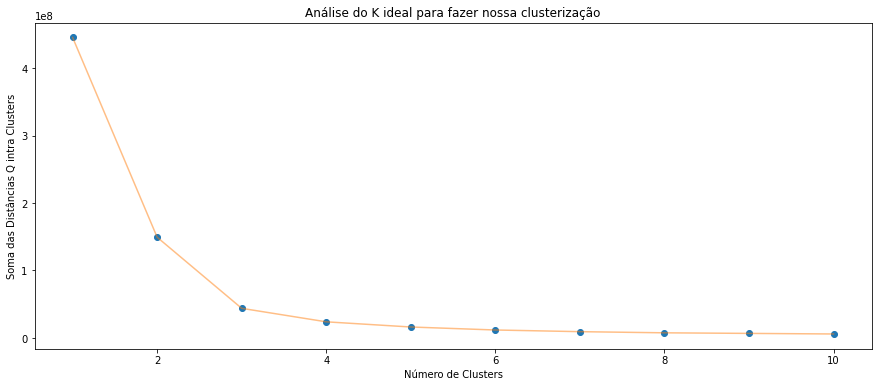

In [470]:
inertia = []
for n in range(1 , 11):
    print(n)
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(df_cluster_user.drop(columns=['buyer_id']))
    inertia.append(algorithm.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.title('Análise do K ideal para fazer nossa clusterização')
plt.show()

In [471]:
kmeans = KMeans(n_clusters=3).fit_predict(df_cluster_user.drop(columns=['buyer_id']))

In [472]:
df_clusteruser = df_cluster_user.copy()
df_clusteruser['cluster'] = kmeans

In [630]:
df_clusteruser[df_clusteruser['cluster'] == 0 ].describe()

,buyer_id,total_gasto,num_compras,tempo_medio_de_volta,cluster
count,9.232810e+05,923281.000000,923281.000000,923281.000000,923281.0
mean,5.740160e+06,1.654939,1.109095,0.322225,0.0
std,2.024291e+06,1.378992,0.808406,1.882488,0.0
min,6.000000e+01,1.000000,1.000000,0.000000,0.0
25%,4.991655e+06,1.096556,1.000000,0.000000,0.0
50%,6.602145e+06,1.289667,1.000000,0.000000,0.0
75%,7.165738e+06,1.689497,1.000000,0.000000,0.0
max,1.201479e+07,119.534491,66.000000,16.500000,0.0


In [631]:
df_clusteruser[df_clusteruser['cluster'] == 1 ].count()

buyer_id                29670
total_gasto             29670
num_compras             29670
tempo_medio_de_volta    29670
cluster                 29670
dtype: int64

In [474]:
df_clusteruser[df_clusteruser['cluster'] == 1 ].describe()

,buyer_id,total_gasto,num_compras,tempo_medio_de_volta,cluster
count,2.967000e+04,29670.000000,29670.000000,29670.000000,29670.0
mean,4.466813e+06,3.194876,2.088574,100.057246,1.0
std,2.120706e+06,1.434244,0.284133,26.058930,0.0
min,3.720000e+02,2.001485,2.000000,67.000000,1.0
25%,2.686250e+06,2.329032,2.000000,79.000000,1.0
50%,5.335842e+06,2.708422,2.000000,92.000000,1.0
75%,6.106852e+06,3.531139,2.000000,117.000000,1.0
max,1.106026e+07,32.594287,3.000000,181.000000,1.0


In [632]:
df_clusteruser[df_clusteruser['cluster'] == 2 ].count()

buyer_id                147698
total_gasto             147698
num_compras             147698
tempo_medio_de_volta    147698
cluster                 147698
dtype: int64

In [475]:
df_clusteruser[df_clusteruser['cluster'] == 2 ].describe()

,buyer_id,total_gasto,num_compras,tempo_medio_de_volta,cluster
count,1.476980e+05,147698.000000,147698.000000,147698.000000,147698.0
mean,4.765366e+06,4.484063,3.479086,33.237022,2.0
std,2.194841e+06,2.617475,1.746681,10.606455,0.0
min,6.500000e+01,2.000000,2.000000,11.000000,2.0
25%,3.116552e+06,2.393502,2.000000,29.000000,2.0
50%,5.406569e+06,3.790608,3.000000,30.200000,2.0
75%,6.717807e+06,6.088239,5.000000,35.500000,2.0
max,1.180220e+07,108.709762,13.000000,66.500000,2.0


In [633]:
gp0 = 923281
gp1 = 29670
gp2 = 147698
aux1 = df_clusteruser.drop(columns=['buyer_id']).groupby('cluster').mean()

In [636]:
aux1.rename(columns={"total_gasto":"Média de Gasto", "num_compras": "Média de Compras"}, inplace=True)
aux1.loc[0, "Quantidade de Clientes"] = gp0
aux1.loc[1, "Quantidade de Clientes"] = gp1
aux1.loc[2, "Quantidade de Clientes"] = gp2

In [638]:
len(df_1.buyer_id.unique())

1100649

In [637]:
aux1

,Média de Gasto,Média de Compras,tempo_medio_de_volta,Quantidade de Clientes
cluster,,,,
0,1.654939,1.109095,0.322225,923281.0
1,3.194876,2.088574,100.057246,29670.0
2,4.484063,3.479086,33.237022,147698.0


In [476]:
p = df_clusteruser.loc[df_clusteruser['cluster'] == 0,['total_gasto',"tempo_medio_de_volta"] ].copy()
p = p.groupby('tempo_medio_de_volta').sum()
p.plot(kind='scatter',
       disable_scientific_axes="y",
       size=5,
       fill_color='orangered',
       fill_alpha=0.6,
       line_color=None,
)

Figure(id='80170', ...)

In [477]:
p = df_clusteruser.loc[df_clusteruser['cluster'] == 1,['total_gasto',"tempo_medio_de_volta"] ].copy()
p = p.groupby('tempo_medio_de_volta').sum()

In [478]:
p.plot(kind='scatter',
       disable_scientific_axes="x",
       size=5,
       fill_color='orangered',
       fill_alpha=0.6,
       line_color=None,
)

Figure(id='81846', ...)

In [479]:
p = df_clusteruser.loc[df_clusteruser['cluster'] == 2,['total_gasto',"tempo_medio_de_volta"] ].copy()
p = p.groupby('tempo_medio_de_volta').sum()
p.plot(kind='scatter',
       disable_scientific_axes="y",
       size=5,
       fill_color='orangered',
       fill_alpha=0.6,
       line_color=None,
)

Figure(id='83532', ...)

In [480]:
df_clusteruser['cluster'].value_counts()/df_clusteruser['cluster'].value_counts().sum()*100

0    83.885144
2    13.419174
1     2.695682
Name: cluster, dtype: float64

In [481]:
grafico_barra = pd.DataFrame()
grafico_barra2 = pd.DataFrame()

In [482]:
lucro = df_clusteruser[df_clusteruser['cluster'] == 0 ].total_gasto.sum()/df_cluster_user.total_gasto.sum()*100
rep = df_clusteruser[df_clusteruser['cluster'] == 0 ].shape[0]/df_cluster_user.shape[0]*100
grafico_barra.loc[0, 'Grupo 0'] = lucro
grafico_barra2.loc[0, 'Grupo 0'] = rep
print("Grupo 0\nRepresentação de {:.2f} % dos Lucros\nRepresentação dos Compradores: {:.2f}%".format(lucro,rep))

Grupo 0
Representação de 66.87 % dos Lucros
Representação dos Compradores: 83.89%


In [483]:
lucro = df_clusteruser[df_clusteruser['cluster'] == 1 ].total_gasto.sum()/df_cluster_user.total_gasto.sum()*100
rep = df_clusteruser[df_clusteruser['cluster'] == 1 ].shape[0]/df_cluster_user.shape[0]*100
grafico_barra.loc[0, 'Grupo 1'] = lucro
grafico_barra2.loc[0, 'Grupo 1'] = rep
print("Grupo 1\nRepresentação de {:.2f}% dos Lucros\nRepresentação dos Compradores: {:.2f}%".format(lucro,rep))

Grupo 1
Representação de 4.15% dos Lucros
Representação dos Compradores: 2.70%


In [484]:
lucro = df_clusteruser[df_clusteruser['cluster'] == 2 ].total_gasto.sum()/df_cluster_user.total_gasto.sum()*100
rep = df_clusteruser[df_clusteruser['cluster'] == 2 ].shape[0]/df_cluster_user.shape[0]*100
grafico_barra.loc[0, 'Grupo 2'] = lucro
grafico_barra2.loc[0, 'Grupo 2'] = rep
print("Grupo 2\nRepresentação de {:.2f}% dos Lucros\nRepresentação dos Compradores: {:.2f}%".format(lucro,rep))

Grupo 2
Representação de 28.98% dos Lucros
Representação dos Compradores: 13.42%


In [485]:
grafico_barra.plot(kind='bar',
                   title ="Representatividade do faturamento de cada grupo de cliente",
                   figsize =(800,600),
                   xlabel = "Grupo",
                   disable_scientific_axes="y",
                   ylabel="Lucro(%)",
                   colormap=["palegreen", "darkturquoise", "tomato"])

Figure(id='85264', ...)

In [640]:
grafico_barra2.plot(kind='bar',
                   title ="Porcentagem de cada grupo no total de usuários",
                   figsize =(800,600),
                   xlabel = "Grupo",
                   disable_scientific_axes="y",
                   ylabel="Quantidade de Usuários(%)",
                   colormap=["palegreen", "darkturquoise", "tomato"])

Figure(id='149772', ...)


* Segmentamos os nossos clientes pelos atributos número de compras, tempo médio para voltar a comprar e o gasto total que ele já fez.

---

## 5° Quais características mais impactam no sucesso de um produto? Ou seja, o que faz um produto vender mais?

In [487]:
df_5 = df_1.copy()
df_5.head()

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network
1,1663958,6640.0,209372.0,116238.0,1200397.0,2016-06-26 12:00:00,2011-03-19 15:47:36,Video,Presentation skills,1.218364,50.0,Smart TV,Origin ef2b,0.0
2,1677087,2350.0,141418.0,2821.0,1083764.0,2016-06-26 12:00:00,2010-07-05 01:50:15,Podcast,Child psychology,1.288181,60.0,Smart TV,Origin ef2b,0.0
3,2017360,35669.0,618642.0,618642.0,1436106.0,2016-06-26 12:00:00,2012-06-13 02:59:37,Podcast,Presentation skills,1.057176,0.0,Smart TV,Origin ef2b,0.0
4,2017379,57998.0,1164511.0,70388.0,1436118.0,2016-06-26 12:00:00,2013-05-07 08:51:31,Podcast,Anxiety management,1.110846,50.0,Smart TV,Origin ef2b,0.0
5,2017382,58329.0,1261488.0,221253.0,1386357.0,2016-06-26 12:00:00,2013-05-12 08:12:06,Podcast,Teaching English,1.070233,50.0,Smart TV,Origin ef2b,0.0


In [488]:
# Top 5 dos produtos mais vendidos
num = 5
top5 = list(df_5.product_id.value_counts().index[0:num])

In [489]:
df_top5 = df_5.loc[df_5['product_id'].isin(top5)].copy()

In [641]:
len(df_1['product_id'].unique())

17883

In [490]:
print("TOP {}\nRepresentativida no lucro: {:.2f}%".format(num,df_top5['purchase_value'].sum()/df_1['purchase_value'].sum()*100))

TOP 5
Representativida no lucro: 7.47%


In [491]:
"""
for i in df_top5.columns:
    #print(df_top5.loc[df_top5.product_id == top5[0], [i]].value_counts())
    df_top5.loc[df_top5.product_id == top5[0], [i]].value_counts()
"""

'\nfor i in df_top5.columns:\n    #print(df_top5.loc[df_top5.product_id == top5[0], [i]].value_counts())\n    df_top5.loc[df_top5.product_id == top5[0], [i]].value_counts()\n'

In [492]:
df_1.describe()

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_value,affiliate_commission_percentual,is_origin_page_social_network
count,1.599828e+06,1.599828e+06,1.599828e+06,1.599828e+06,1.599828e+06,1.599828e+06,1.599828e+06,1.599828e+06
mean,1.244546e+07,1.485958e+05,2.297501e+06,2.164480e+06,5.187551e+06,1.425363e+00,7.597402e+00,2.303435e-02
std,9.175820e+05,5.554317e+04,2.092656e+06,2.038960e+06,2.199257e+06,7.821040e-01,1.847787e+01,1.500126e-01
min,1.663958e+06,4.000000e+00,3.000000e+00,3.000000e+00,6.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.165374e+07,1.121380e+05,4.422410e+05,4.095900e+05,3.730213e+06,1.069817e+00,0.000000e+00,0.000000e+00
50%,1.246849e+07,1.543100e+05,1.690428e+06,1.377289e+06,5.999154e+06,1.151340e+00,0.000000e+00,0.000000e+00
75%,1.323310e+07,1.939340e+05,3.992235e+06,3.776238e+06,6.946337e+06,1.478797e+00,0.000000e+00,0.000000e+00
max,1.435720e+07,3.191290e+05,7.700836e+06,9.868481e+06,1.201479e+07,1.000000e+02,1.000000e+02,1.000000e+00


In [493]:
# São produtos que estão abaixo do preço médio
participacao = df_top5.groupby(by= ['product_id', 'product_category', 'product_niche', 'purchase_device'])['purchase_value'].agg(Faturamento='sum', Preco_Medio = 'mean',Quantidade_Vendas='count').copy()
participacao.head(60)

Faturamento  \
product_id product_category product_niche          purchase_device                 
42903.0    Phisical book    YouTube video creation Cellphone           19.660203   
                                                   Desktop           5727.262788   
                                                   Smart TV         27319.080363   
                                                   Tablet               7.372576   
                                                   eReaders           383.373952   
63718.0    Phisical book    YouTube video creation Cellphone           61.815973   
                                                   Desktop           3764.154518   
                                                   Smart TV         19764.641386   
                                                   Tablet              20.096918   
                                                   eReaders          5035.279013   
130294.0   Phisical book    Immigration            Cellphone          103.261499   
                                                   Desktop          12580.417483   
                                                   Smart TV         18227.787120   
                                                   Tablet              48.686144   
                                                   eReaders          7261.970036   
132809.0   Phisical book    Personal finance       Cellphone           22.553447   
                                                   Desktop           1055.872419   
                                                   Smart TV         20207.462432   
                                                   Tablet               2.139634   
                                                   eReaders          3389.995479   
219755.0   Phisical book    Immigration            Cellphone         1939.798907   
                                                   Desktop          16859.249757   
                                                   Smart TV         11127.112142   
                                                   Tablet              17.875162   
                                                   eReaders         15445.333028   

                                                                    Preco_Medio  \
product_id product_category product_niche          purchase_device                
42903.0    Phisical book    YouTube video creation Cellphone           1.228763   
                                                   Desktop             1.228763   
                                                   Smart TV            1.228763   
                                                   Tablet              1.228763   
                                                   eReaders            1.228763   
63718.0    Phisical book    YouTube video creation Cellphone           1.188769   
                                                   Desktop             1.185934   
                                                   Smart TV            1.188922   
                                                   Tablet              1.182172   
                                                   eReaders            1.180605   
130294.0   Phisical book    Immigration            Cellphone           1.186914   
                                                   Desktop             1.179709   
                                                   Smart TV            1.158276   
                                                   Tablet              1.187467   
                                                   eReaders            1.170908   
132809.0   Phisical book    Personal finance       Cellphone           1.025157   
                                                   Desktop             1.023132   
                                                   Smart TV            1.066132   
                                                   Tablet              1.069817   
                                                   eReade

In [520]:
participacao.Quantidade_Vendas.sum()*100

14866100

In [494]:
#Cor - #E54F22
df_5.purchase_device.value_counts()/df_5.purchase_device.value_counts().sum()*100

eReaders     41.516776
Desktop      36.372660
Smart TV     20.631780
Cellphone     1.294389
Tablet        0.184395
Name: purchase_device, dtype: float64

In [521]:
grafico_barras = pd.DataFrame()
grafico_barras2 = pd.DataFrame()
aux = participacao.reset_index().groupby(by=['purchase_device']).sum()[['Faturamento', 'Quantidade_Vendas']].copy()
grafico_barras.loc[0, "Cellphone"] = aux.loc['Cellphone'].Faturamento/participacao.Faturamento.sum()*100
grafico_barras.loc[0, "Desktop"] = aux.loc['Desktop'].Faturamento/participacao.Faturamento.sum()*100
grafico_barras.loc[0, "Smart TV"] = aux.loc['Smart TV'].Faturamento/participacao.Faturamento.sum()*100
grafico_barras.loc[0, "Tablet"] = aux.loc['Tablet'].Faturamento/participacao.Faturamento.sum()*100
grafico_barras.loc[0, "eReaders"] = aux.loc['eReaders'].Faturamento/participacao.Faturamento.sum()*100

grafico_barras2.loc[0, "Cellphone"] = aux.loc['Cellphone'].Quantidade_Vendas/participacao.Quantidade_Vendas.sum()*100
grafico_barras2.loc[0, "Desktop"] = aux.loc['Desktop'].Quantidade_Vendas/participacao.Quantidade_Vendas.sum()*100
grafico_barras2.loc[0, "Smart TV"] = aux.loc['Smart TV'].Quantidade_Vendas/participacao.Quantidade_Vendas.sum()*100
grafico_barras2.loc[0, "Tablet"] = aux.loc['Tablet'].Quantidade_Vendas/participacao.Quantidade_Vendas.sum()*100
grafico_barras2.loc[0, "eReaders"] = aux.loc['eReaders'].Quantidade_Vendas/participacao.Quantidade_Vendas.sum()*100

In [497]:
grafico_barras

,Cellphone,Desktop,Smart TV,Tablet,eReaders
0,2147.090028,39986.956965,96646.083442,96.170434,31515.951508


In [525]:
grafico_barras2.plot(kind='bar',
                   title ="Top5 - Porcentagem da Quantidade de vendas de cada tipo de dispositivo utilizado no momento da compra",
                   figsize =(800,600),
                   xlabel = "Dispositivo",
                   disable_scientific_axes="y",
                   ylabel="Quantidade (%)")

Figure(id='99856', ...)

In [519]:
grafico_barras.plot(kind='bar',
                   title ="Top5 - Porcentagem de Faturamento de cada tipo de dispositivo utilizado no momento da compra",
                   figsize =(800,600),
                   xlabel = "Dispositivo",
                   disable_scientific_axes="y",
                   ylabel="Lucro(%)")

Figure(id='92460', ...)

## Conclusão 5

---

## 6° Afiliados fakes?
Aparentemente, existem vendas que possuem os atributos affiliate_id e producer_id diferentes, o que carecteriza vendas com intermediação de afiliados, e tem afiliados que **não recebem comissão** pela venda, algo que é estranho. Quando isso acontece, ocorre 99.9% das vezes em vendas de livros físicos. Além disso, 67% dos casos os clientes vem da smart tv. Dos filiados que recebem comissão, 1% das vendas vieram pela smart tv.

In [501]:
df_f1 = df_1.loc[(df_1.affiliate_id != df_1.producer_id) & (df_1.affiliate_commission_percentual != 0)]
df_f2 = df_1.loc[(df_1.affiliate_id != df_1.producer_id)& (df_1.affiliate_commission_percentual == 0)].copy()

In [502]:
df_f1.describe()

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_value,affiliate_commission_percentual,is_origin_page_social_network
count,2.609740e+05,260974.000000,2.609740e+05,2.609740e+05,2.609740e+05,260974.000000,260974.000000,260974.000000
mean,1.240589e+07,125540.956038,2.417929e+06,1.735731e+06,5.455444e+06,1.410354,46.573747,0.015730
std,9.405889e+05,58512.480490,2.063352e+06,1.685690e+06,2.172055e+06,0.643076,16.666612,0.124427
min,1.663958e+06,17.000000,5.900000e+01,5.900000e+01,8.000000e+01,1.000000,0.010000,0.000000
25%,1.158749e+07,83377.000000,5.454780e+05,3.734450e+05,4.234877e+06,1.105929,36.140000,0.000000
50%,1.238345e+07,126693.000000,1.894519e+06,9.921510e+05,6.463028e+06,1.184258,50.000000,0.000000
75%,1.324049e+07,174833.000000,4.002788e+06,2.784458e+06,7.043111e+06,1.441185,55.920000,0.000000
max,1.401199e+07,319129.000000,7.700836e+06,9.868481e+06,1.186178e+07,18.825648,100.000000,1.000000


In [503]:
df_f2.describe()

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_value,affiliate_commission_percentual,is_origin_page_social_network
count,9.177200e+04,91772.000000,9.177200e+04,9.177200e+04,9.177200e+04,91772.000000,91772.0,91772.000000
mean,1.244392e+07,120167.739823,2.059616e+06,1.680688e+06,4.465112e+06,1.147419,0.0,0.004282
std,9.239455e+05,48679.586028,1.968334e+06,1.778096e+06,2.229950e+06,0.153841,0.0,0.065300
min,3.986366e+06,3336.000000,6.200000e+01,1.110000e+02,9.100000e+01,1.000000,0.0,0.000000
25%,1.164989e+07,85986.000000,3.580980e+05,4.422410e+05,2.604771e+06,1.059271,0.0,0.000000
50%,1.245826e+07,130294.000000,1.504740e+06,4.648460e+05,5.088878e+06,1.111262,0.0,0.000000
75%,1.325429e+07,143399.000000,3.124408e+06,3.992235e+06,6.228508e+06,1.228763,0.0,0.000000
max,1.401192e+07,239080.000000,7.674668e+06,7.510576e+06,1.180220e+07,4.924025,0.0,1.000000


In [504]:
# Quantidade de afiliados que tem comissão
a = set(df_f1.affiliate_id.unique())
print("Quantidade de afiliados que tem comissão: ", len(df_f1.affiliate_id.unique()))

Quantidade de afiliados que tem comissão:  15142


In [505]:
# Quantidade de afiliados que não tem comissão
b = set(df_f2.affiliate_id.unique())
print("Quantidade de afiliados que não tem comissão: ", len(df_f2.affiliate_id.unique()))

Quantidade de afiliados que não tem comissão:  3489


In [506]:
print("Quantidade filiados que já receberam comissão, mas também já não receberam: ", len(a.intersection(b)))

Quantidade filiados que já receberam comissão, mas também já não receberam:  1764


In [507]:
df_f1.purchase_device.value_counts()/df_f1.purchase_device.value_counts().sum()*100

eReaders     54.553327
Desktop      42.834152
Cellphone     1.271391
Smart TV      1.104708
Tablet        0.236422
Name: purchase_device, dtype: float64

In [508]:
df_f1.product_category.value_counts()/df_f1.product_category.value_counts().sum()*100

Phisical book      78.496325
Podcast            19.179305
Workshop            1.501682
Subscription        0.449470
eBook               0.138711
In-class course     0.116487
eTicket             0.059010
App                 0.058243
Video               0.000766
Name: product_category, dtype: float64

In [509]:
# Isso acontence em 99.9% nos casos que vendem produtos da categoria livro físico
df_f2.product_category.value_counts()/df_f2.product_category.value_counts().sum()*100

Phisical book      99.966221
In-class course     0.015255
Workshop            0.013076
Podcast             0.005448
Name: product_category, dtype: float64

In [510]:
df_f2.purchase_device.value_counts()/df_f2.purchase_device.value_counts().sum()*100

Smart TV     67.076014
Desktop      19.519025
eReaders     13.083511
Cellphone     0.249531
Tablet        0.071917
Name: purchase_device, dtype: float64

In [511]:
df_1.loc[(df_1.product_category == 'Phisical book') & (df_1.affiliate_id != df_1.producer_id) & (df_1.affiliate_commission_percentual > 0)].describe()

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_value,affiliate_commission_percentual,is_origin_page_social_network
count,2.048550e+05,204855.000000,2.048550e+05,2.048550e+05,2.048550e+05,204855.000000,204855.000000,204855.000000
mean,1.236788e+07,119565.854277,2.268377e+06,1.550261e+06,5.405338e+06,1.477855,45.790511,0.015743
std,9.308685e+05,57059.991847,2.009872e+06,1.612246e+06,2.182068e+06,0.691814,17.255936,0.124479
min,2.017387e+06,540.000000,5.900000e+01,6.000000e+01,1.200000e+02,1.000000,0.010000,0.000000
25%,1.156517e+07,80572.000000,5.124760e+05,3.306230e+05,4.115770e+06,1.144091,36.140000,0.000000
50%,1.232558e+07,114062.000000,1.722298e+06,7.109890e+05,6.322343e+06,1.292638,50.000000,0.000000
75%,1.317773e+07,166734.000000,3.597060e+06,2.307584e+06,7.004291e+06,1.515875,56.500000,0.000000
max,1.401199e+07,319129.000000,7.700836e+06,9.868481e+06,1.186178e+07,18.825648,100.000000,1.000000


In [512]:
df_1.loc[(df_1.product_category == 'Phisical book') & (df_1.affiliate_id != df_1.producer_id) & (df_1.affiliate_commission_percentual == 0)].describe()

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_value,affiliate_commission_percentual,is_origin_page_social_network
count,9.174100e+04,91741.000000,9.174100e+04,9.174100e+04,9.174100e+04,91741.000000,91741.0,91741.000000
mean,1.244383e+07,120166.376854,2.059493e+06,1.680926e+06,4.464704e+06,1.147234,0.0,0.004284
std,9.239452e+05,48657.429946,1.968038e+06,1.778231e+06,2.229885e+06,0.153245,0.0,0.065311
min,3.986366e+06,3336.000000,6.200000e+01,1.110000e+02,9.100000e+01,1.000000,0.0,0.000000
25%,1.164982e+07,85986.000000,3.580980e+05,4.422410e+05,2.604771e+06,1.059271,0.0,0.000000
50%,1.245783e+07,130294.000000,1.504740e+06,4.648460e+05,5.088876e+06,1.111262,0.0,0.000000
75%,1.325422e+07,143399.000000,3.124408e+06,3.992235e+06,6.226363e+06,1.228763,0.0,0.000000
max,1.401192e+07,239080.000000,7.674668e+06,7.510576e+06,1.180220e+07,4.924025,0.0,1.000000
